## Business Project - Predictive Model - Factors driving the disability incidence in England

<b>Academic Year : 2022/23
<BR>
Module Code : BDM163
    <br>
Mentored By : Dr. Viktor Pekar
    <br>
Project By : 220303420

<b>This notebook submission consists of data visualization, data transformation and modelling for prediction

## Table of Contents

<b>
1. Importing python libraries 
<br>
<b>
2. Data Loading
<br>
<b>
3. Data Splitting
<br>
<b>
4. Descriptive Statistics and Data Exploration
<br>
<b>
5. Data Preprocessing
<br>
<b>
6. Feature Engineering
<br>
<b>
7. Data Transformation
<br>
<b>
8. Data Scaling
<br>
<b>
9. Baseline Method
<br>
<b>
10. Model Building
    <br>
<b>
11. Model Evaluation on test data
    <br>
<b>
12. Conclusion and Future Improvements


## 1. Importing python libraries 

In [1]:
#Importing python base Libraries
import re
import time
import warnings
import numpy as np
import pandas as pd

#Libraries used for Plotting
import seaborn as sns
sns.set(style="darkgrid")
sns.set_theme() 
import matplotlib.pyplot as plt
%matplotlib inline

# Used for warnings
import warnings
warnings.filterwarnings("ignore")

#Libraries used for Data Splitting, Preprocessing and Cleaning
from sklearn.model_selection import train_test_split


#Libraries used for Data transformation, dummies
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# used for data scaling
from sklearn.preprocessing import StandardScaler

In [2]:
#used for building different models

#For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#For Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#For Random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#For Random Forest Feature selection
from sklearn.feature_selection import RFECV

#For Support Vector Regression
from sklearn.svm import SVR

#For Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor

#For Lasso Regressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

#For Lasso feature selection
from sklearn.pipeline import Pipeline

#For Ridge Regressor
from sklearn.linear_model import Ridge, RidgeCV

#For XGBoost Regressor
from xgboost import XGBRegressor

#For Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor

#For Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor

#used to store the model  
import os
from joblib import dump

#used to load the saved model
from joblib import load

#used to check the word count of the jupyter notebook
import io
from nbformat import read, NO_CONVERT

## 2. Data Loading

In [3]:
#Data Preparation
# Reading and loading the csv data into dataframe
census_df = pd.read_excel('Disability_Census_Data_regionwise_updated.xlsx')

In [4]:
#checking the number of rows and columns imported
print(census_df.shape)

(1080, 19)


In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1080 non-null   int64  
 1   Region                               1080 non-null   object 
 2   Sex                                  1080 non-null   object 
 3   Age                                  1080 non-null   object 
 4   No_of_disability_per_1000_of_pop     1080 non-null   float64
 5   LFE                                  1080 non-null   float64
 6   Smoking                              1080 non-null   float64
 7   Deaths                               1080 non-null   int64  
 8   ASMR                                 1080 non-null   float64
 9   GPs                                  1080 non-null   int64  
 10  Median_Income                        1080 non-null   int64  
 11  No_Of_Jobs                    

In [6]:
# Validating / Overview the loaded census data
census_df.head()

,Year,Region,Sex,Age,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,Marital_status_Divorced,Marital_status_Widowed,Household_Deprived_1_more_dimension,Fertility_Rate
0,2001,North East,Female,Under 1,1.8,79.46,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
1,2001,North East,Female,1 to 4,3.4,78.81,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
2,2001,North East,Female,5 to 9,4.7,74.89,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
3,2001,North East,Female,10 to 14,4.7,69.92,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
4,2001,North East,Female,15 to 19,5.5,64.95,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6


In [7]:
#checking the number of rows and columns imported
print(census_df.shape)

(1080, 19)


In [8]:
#explore the data columns/features and understand their datatypes and null values if any
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1080 non-null   int64  
 1   Region                               1080 non-null   object 
 2   Sex                                  1080 non-null   object 
 3   Age                                  1080 non-null   object 
 4   No_of_disability_per_1000_of_pop     1080 non-null   float64
 5   LFE                                  1080 non-null   float64
 6   Smoking                              1080 non-null   float64
 7   Deaths                               1080 non-null   int64  
 8   ASMR                                 1080 non-null   float64
 9   GPs                                  1080 non-null   int64  
 10  Median_Income                        1080 non-null   int64  
 11  No_Of_Jobs                    

In [9]:
# Validating / Overview census data
census_df.head()

,Year,Region,Sex,Age,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,Marital_status_Divorced,Marital_status_Widowed,Household_Deprived_1_more_dimension,Fertility_Rate
0,2001,North East,Female,Under 1,1.8,79.46,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
1,2001,North East,Female,1 to 4,3.4,78.81,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
2,2001,North East,Female,5 to 9,4.7,74.89,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
3,2001,North East,Female,10 to 14,4.7,69.92,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6
4,2001,North East,Female,15 to 19,5.5,64.95,25.6,28391,1046.2,323,10678,373,29.0,44.0,2.4,8.5,9.3,63.15,1.6


In [10]:
census_df.isna().sum()

Year                                   0
Region                                 0
Sex                                    0
Age                                    0
No_of_disability_per_1000_of_pop       0
LFE                                    0
Smoking                                0
Deaths                                 0
ASMR                                   0
GPs                                    0
Median_Income                          0
No_Of_Jobs                             0
Marital_status_single                  0
Marital_status_Married                 0
Marital_status_Seperated               0
Marital_status_Divorced                0
Marital_status_Widowed                 0
Household_Deprived_1_more_dimension    0
Fertility_Rate                         0
dtype: int64

## 3. Data Splitting


<b>In order to train and test the predictive model ,we need to split the X and y dataframes into train and test data sets
<br>We should set aside the test part of the dataset, to avoid data snooping (bias) and should not explore the test data as it might assist us in pre-processing and making biased algorithm choices and would lead to over optimistic evaluation of model accuracy

In [11]:
#To ensure we have the same split and the same result, we need to define the random state.
#We will split the dataset in 80% train and 20% test

train_set, test_set = train_test_split(census_df, test_size=0.2, random_state=2023)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

864 train and 216 test instances


In [12]:
#shape of the 2 dataframes
print(train_set.shape)
print(test_set.shape)


(864, 19)
(216, 19)


## 3. Descriptive Statistics and Data Exploration

<b>Some predictor variables will be used for predictive modelling and so descriptive statistical analysis will help us to understand the correlation between variables.
Data exploration will help us understand the outliers, missing values etc
    <br>
As an industry practice we should not explore/snoop the test data and hence all our data exploration would be done only on training dataset



In [13]:
# To understand the distribution of the numerical values, one can use the describe() method of a dataframe:
train_set.describe().round(2)

,Year,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,Marital_status_Divorced,Marital_status_Widowed,Household_Deprived_1_more_dimension,Fertility_Rate
count,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00
mean,2010.94,24.73,40.52,21.30,36763.29,955.00,732.31,21448.80,964.08,33.59,45.26,2.44,8.89,7.23,56.75,1.75
std,8.19,23.72,25.18,6.22,17076.05,356.79,244.95,6580.41,319.80,4.50,2.79,0.24,0.68,1.10,4.57,0.15
min,2001.00,0.80,3.73,9.50,12400.00,410.70,323.00,10668.00,373.00,26.80,37.40,2.10,7.40,5.00,48.00,1.57
25%,2001.00,6.50,17.01,15.10,24490.00,629.70,575.00,15874.00,783.00,29.00,44.00,2.30,8.50,6.30,53.20,1.62
50%,2011.00,14.50,39.60,22.10,30509.00,1046.20,646.00,20582.00,932.00,33.90,45.60,2.30,9.20,7.20,57.20,1.67
75%,2021.00,37.08,62.94,27.20,51979.00,1223.20,861.00,25976.00,1141.00,35.80,46.90,2.60,9.40,8.10,60.30,1.95
max,2021.00,93.30,84.13,30.60,79575.00,1511.80,1192.00,36449.00,1857.00,44.10,49.90,3.20,9.80,9.30,64.95,1.99


In [14]:
# Validating /listing the train dataframe 
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 586 to 855
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 864 non-null    int64  
 1   Region                               864 non-null    object 
 2   Sex                                  864 non-null    object 
 3   Age                                  864 non-null    object 
 4   No_of_disability_per_1000_of_pop     864 non-null    float64
 5   LFE                                  864 non-null    float64
 6   Smoking                              864 non-null    float64
 7   Deaths                               864 non-null    int64  
 8   ASMR                                 864 non-null    float64
 9   GPs                                  864 non-null    int64  
 10  Median_Income                        864 non-null    int64  
 11  No_Of_Jobs                    

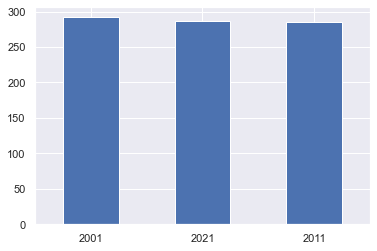

In [15]:
train_set["Year"].value_counts().plot(kind="bar", rot=0)

Another way to inspect the distribution of the variables is to plot histograms. 

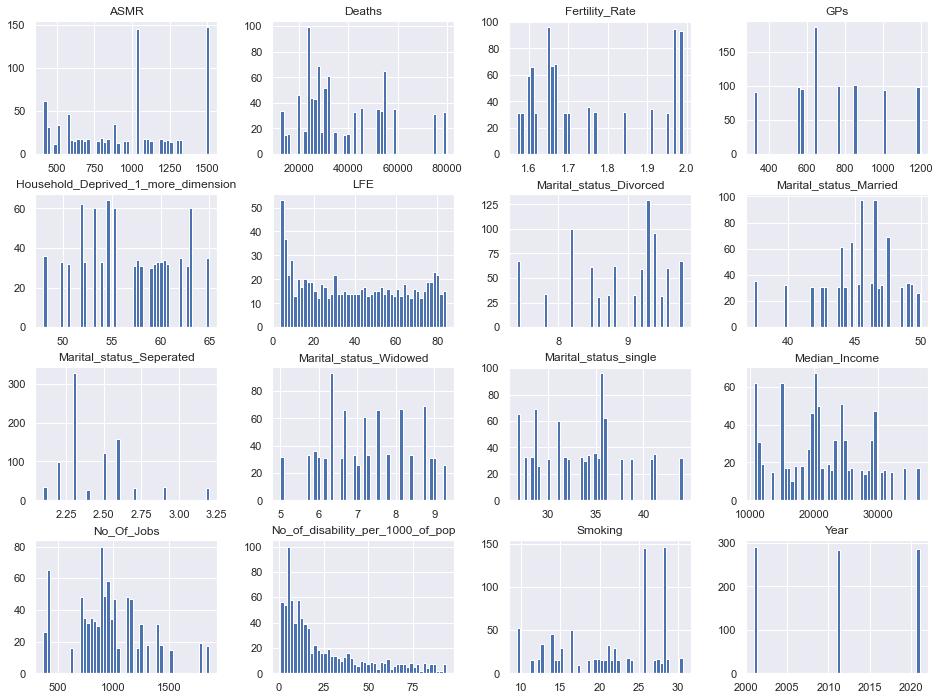

In [16]:
# plotting a histogram for all numerical variables by calling the hist() method on the dataframe
dummy = train_set.hist(bins=50, figsize=(16,12))

<b>Analyzing different Regions of England and their mean age specific percentages of disability

In [17]:
train_set['Region'].unique()

array(['East of England', 'East Midlands', 'South East', 'South West',
       'North East', 'North West', 'West Midlands',
       'Yorkshire and The Humber', 'London'], dtype=object)

In [18]:
train_set["No_of_disability_per_1000_of_pop"].sort_values(ascending=False)

379     93.3
539     93.3
419     93.2
499     92.8
459     92.4
        ... 
880      1.0
840      0.9
1040     0.9
1000     0.9
980      0.8
Name: No_of_disability_per_1000_of_pop, Length: 864, dtype: float64

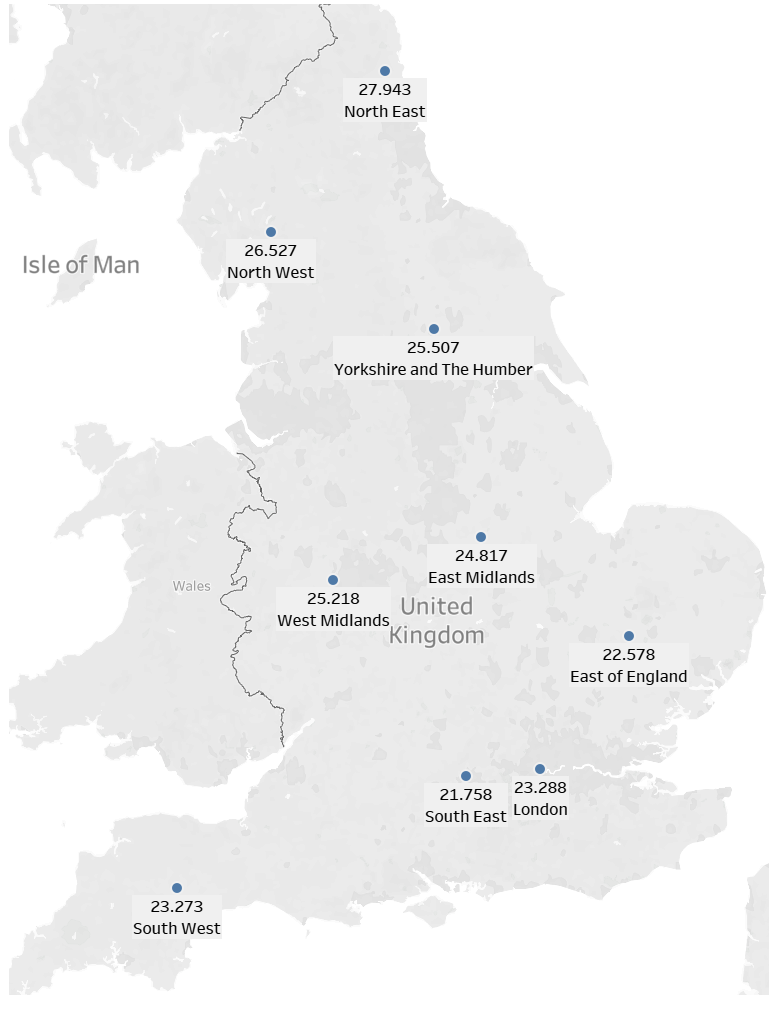

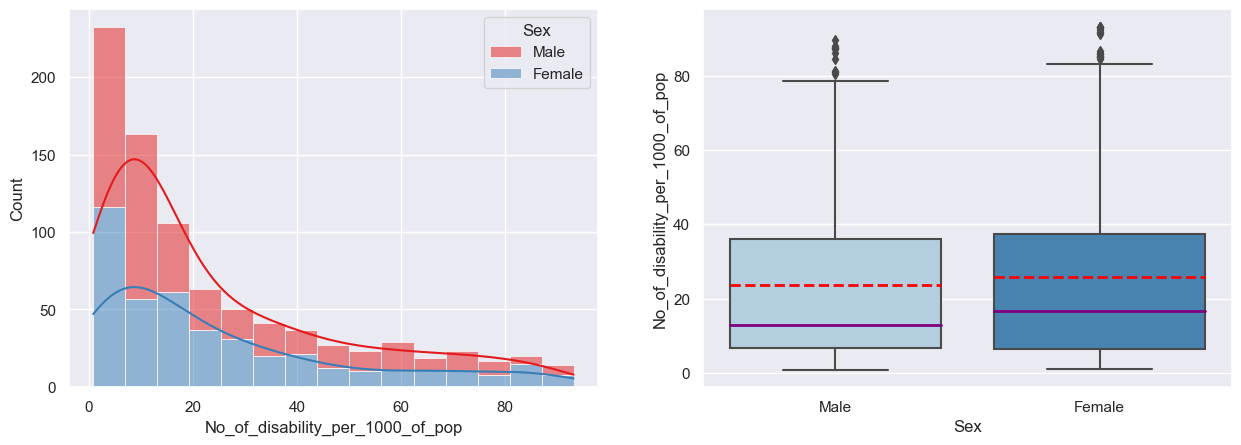

In [19]:
plt.figure(figsize=(15, 5), dpi=100)
plt.subplot(1,2,1)

sns.histplot(data=train_set, x ='No_of_disability_per_1000_of_pop', hue='Sex',kde=True,
             multiple="stack", palette="Set1", bins=15, linewidth=0.5) 

plt.subplot(1,2,2)
#Define plot object

sns.boxplot( y=train_set["No_of_disability_per_1000_of_pop"], x=train_set["Sex"],
            medianprops={'linewidth': 2, 'color': 'purple'},
           showmeans=True, meanline=True, palette="Blues",            
           meanprops={'linewidth': 2, 'color': 'red'})


plt.show()

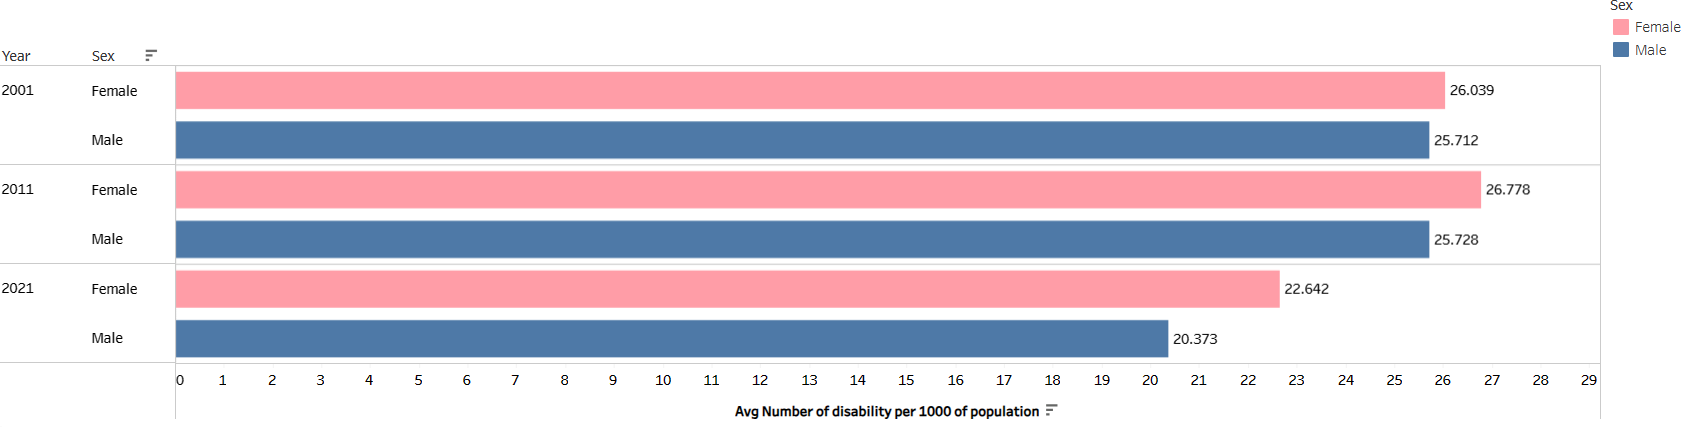

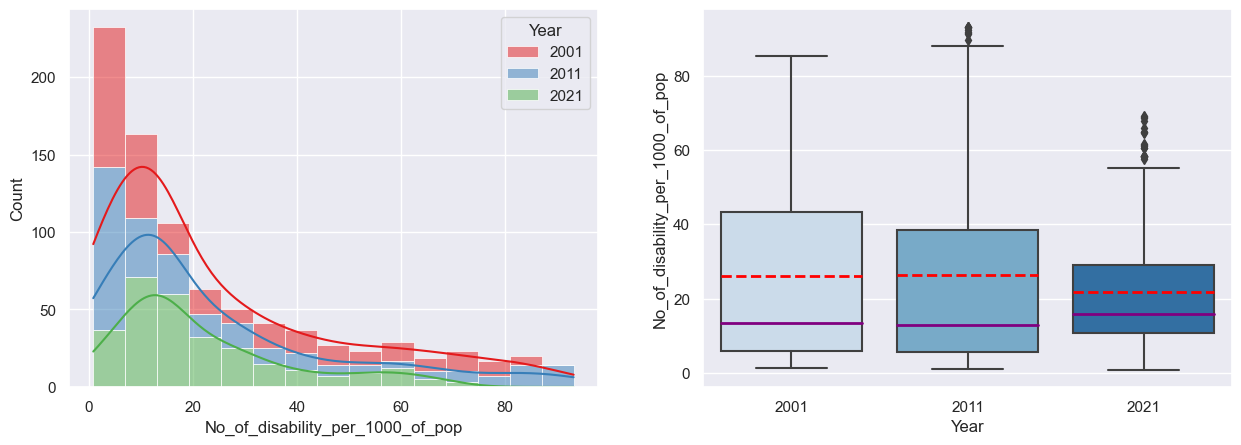

In [20]:
plt.figure(figsize=(15, 5), dpi=100)
plt.subplot(1,2,1)

sns.histplot(data=train_set, x ='No_of_disability_per_1000_of_pop', hue='Year',kde=True,
             multiple="stack", palette="Set1", bins=15, linewidth=0.5) 

plt.subplot(1,2,2)
#Define plot object

sns.boxplot( y=train_set["No_of_disability_per_1000_of_pop"], x=train_set["Year"],
            medianprops={'linewidth': 2, 'color': 'purple'},
           showmeans=True, meanline=True, palette="Blues",            
           meanprops={'linewidth': 2, 'color': 'red'})


plt.show()

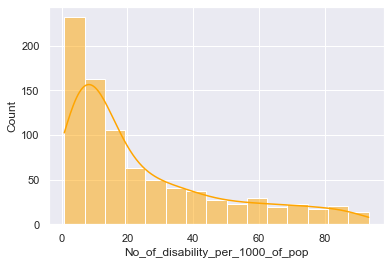

In [21]:
sns.histplot(train_set['No_of_disability_per_1000_of_pop'],kde=True , color='orange')

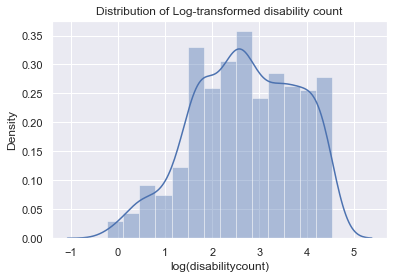

In [22]:
sns.distplot(np.log(train_set['No_of_disability_per_1000_of_pop']))
plt.title('Distribution of Log-transformed disability count')
plt.xlabel('log(disabilitycount)')
plt.show()

In [23]:
print('Disability count has a skew of ' + str(train_set['No_of_disability_per_1000_of_pop'].skew().round(decimals=2)) + 
      ' while the log-transformed disability count improves the skew to ' + 
      str(np.log(train_set['No_of_disability_per_1000_of_pop']).skew().round(decimals=2)))

Disability count has a skew of 1.21 while the log-transformed disability count improves the skew to -0.25


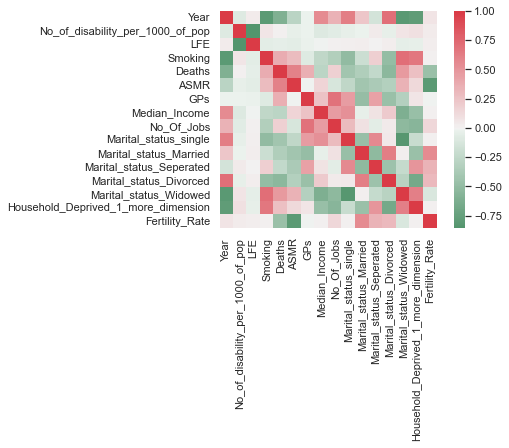

In [24]:
cmap=sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(train_set.corr(),cmap=cmap,center=0, annot=False,square=True)

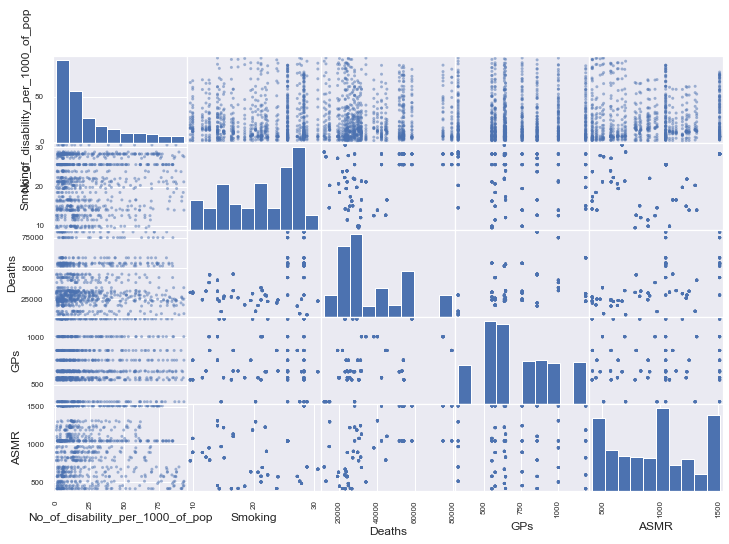

In [25]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","Smoking","Deaths","GPs","ASMR"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

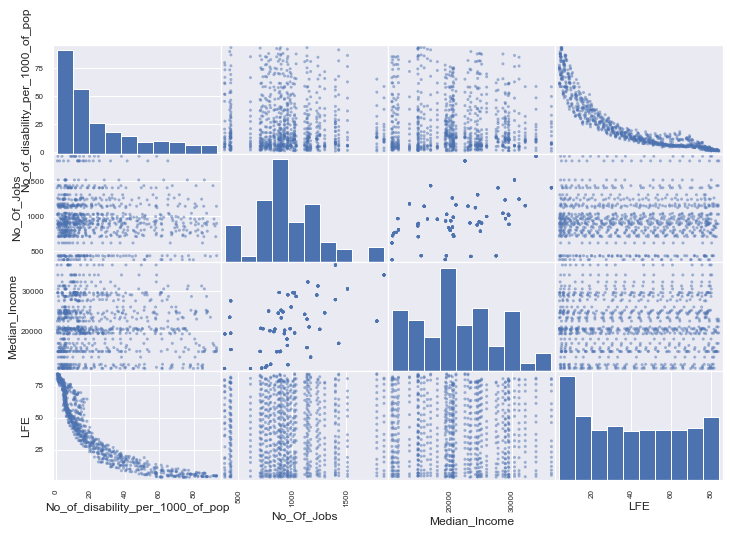

In [26]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","No_Of_Jobs","Median_Income" ,"LFE"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

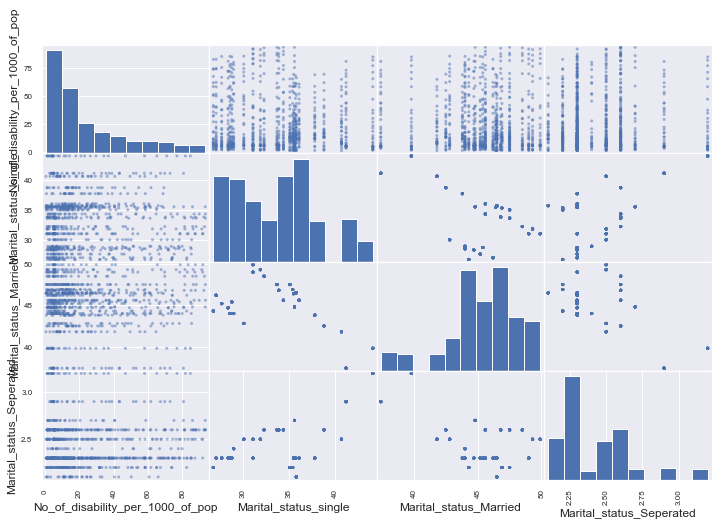

In [27]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","Marital_status_single","Marital_status_Married" ,"Marital_status_Seperated"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

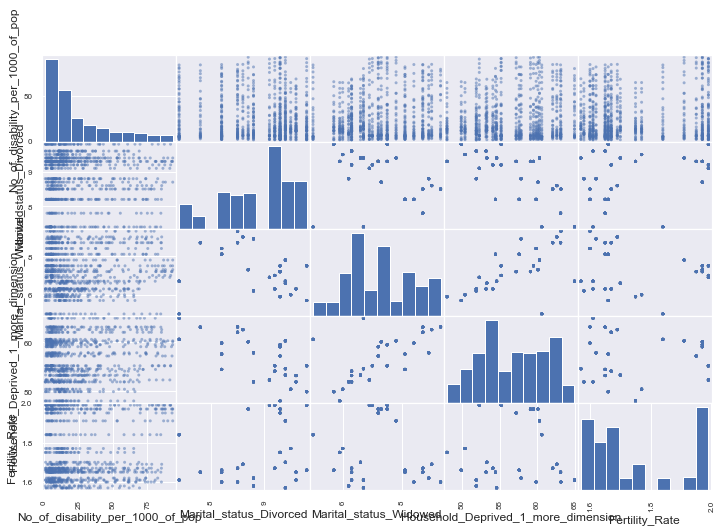

In [28]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
attributes = ["No_of_disability_per_1000_of_pop","Marital_status_Divorced","Marital_status_Widowed","Household_Deprived_1_more_dimension","Fertility_Rate"]
dummy = scatter_matrix(train_set[attributes], figsize=(12, 8))

## 5. Data Preprocessing

<b> 
First check if there are any missing or null values then perfom  cleaning on train set and then on test set
    <br>
    We will clean both the train and test sets however will only execute commands for test set and not explore to see the data in order to avoid snooping.


In [29]:
#sum and Sort all observations that have null data
train_set.isna().sum()[train_set.isna().sum() !=0].sort_values(ascending=False)

Series([], dtype: int64)

In [30]:
#validate data after dropping nulls
train_set.isna().sum()

Year                                   0
Region                                 0
Sex                                    0
Age                                    0
No_of_disability_per_1000_of_pop       0
LFE                                    0
Smoking                                0
Deaths                                 0
ASMR                                   0
GPs                                    0
Median_Income                          0
No_Of_Jobs                             0
Marital_status_single                  0
Marital_status_Married                 0
Marital_status_Seperated               0
Marital_status_Divorced                0
Marital_status_Widowed                 0
Household_Deprived_1_more_dimension    0
Fertility_Rate                         0
dtype: int64

<B>Since the data taken from census publications hence there are no missing or Nan values across the dataset

## 6. Feature Engineering

The target variable No_of_disability_per_1000_of_pop     is the outcome of feature engineering performed on the raw data using excel which was formulated using the Disability count and population.
No_of_disability_per_1000_of_pop  = Disability Count / Population


Similarly all other predictor variables such as LFE, Smoking,Death,ASMR etc were extracted using year,region and gender wise
lookup values from different ONS datasets 

In [31]:
# the number of instances belonging to each Year
train_set["Year"].value_counts()

2001    292
2021    287
2011    285
Name: Year, dtype: int64

In [32]:
# the number of instances belonging to each Region
train_set["Region"].value_counts()

South East                  102
West Midlands               100
South West                   98
London                       98
East Midlands                95
Yorkshire and The Humber     94
North West                   94
East of England              92
North East                   91
Name: Region, dtype: int64

In [33]:
# the number of instances belonging to each Region
train_set["Sex"].value_counts()

Male      436
Female    428
Name: Sex, dtype: int64

This helps us to understand if there is any unbalanced data against any category of dataset, 
Since there isnt any such unbalanced data hence we do not need to perform over or under sampling.

## 7. Data Transformation

<b>7.1 Handling unknowns by using imputation technique

The imputation technique is used when there are unknowns that must be handled rather than dropping the entries.
This is accomplished by the use of a univariate imputation technique in which the unknown values are replaced by the mean, median, or most frequent values.


The present dataset is derived from numerous census and survey datasets for each region and gender, therefore there are no unknowns that would necessitate imputation. 

<b>7.2 Creating Dummies

<b>Creating dummy variables for categorical variables using one hot encoding technique</b>
<br>
There are a lot of categorical variables with multiple categories under them and
so we need to create dummies by performing one hot encoding.<br>
This helps in regression analysis to represent subgroups 

In [34]:
#One hot encoding creates dummy variables with values 1 and 0

#Perform one hot encoding
one_hot_encoder = OneHotEncoder(drop="first", sparse=False,handle_unknown='ignore')

# categorical columns to alter
cat_cols = ["Year","Region", 
            "Sex","Age"]

# fit an encoder and transform the training set
cat_vals = train_set[cat_cols].to_numpy()
transformed = one_hot_encoder.fit_transform(cat_vals)

# Unique values of the category variables are used as the names of the new columns.
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)

# place the altered data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    train_set[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
train_set.head()

,Year,Region,Sex,Age,No_of_disability_per_1000_of_pop,LFE,Smoking,Deaths,ASMR,GPs,...,Age_50 to 54,Age_55 to 59,Age_60 to 64,Age_65 to 69,Age_70 to 74,Age_75 to 79,Age_80 to 84,Age_85 to 89,Age_90+,Age_Under 1
586,2011,East of England,Male,25 to 29,5.5,55.87,24.0,24394,570.4,646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,2021,East Midlands,Female,10 to 14,7.1,73.09,11.5,24577,892.1,575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,2011,South East,Male,30 to 34,6.0,51.07,27.2,19453,574.3,861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,2001,South West,Female,Under 1,1.7,81.74,25.6,54333,1046.2,553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
642,2011,South East,Female,5 to 9,2.6,79.12,23.8,22021,413.6,861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#Verifying the dimension after applying one hot encoding
train_set.shape

(864, 49)

In [36]:
# transform the testing set using the encoder that is fitted on training set
cat_vals = test_set[cat_cols].to_numpy()
transformed = one_hot_encoder.transform(cat_vals)

# place the altered data as columns in the testset 
for i, new_col_name in enumerate(new_col_names):
    test_set[new_col_name] = transformed[:,i]
    

Once dummy variables are created we can drop the original features

In [37]:
#Drop the original categorical variables as dummy variables are created
#this will drop all the original categorical columns on the train and test set
train_set.drop(columns=cat_cols, inplace=True)
test_set.drop(columns=cat_cols, inplace=True)


In [38]:
#Verify the columns on the train dataset
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 586 to 855
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No_of_disability_per_1000_of_pop     864 non-null    float64
 1   LFE                                  864 non-null    float64
 2   Smoking                              864 non-null    float64
 3   Deaths                               864 non-null    int64  
 4   ASMR                                 864 non-null    float64
 5   GPs                                  864 non-null    int64  
 6   Median_Income                        864 non-null    int64  
 7   No_Of_Jobs                           864 non-null    int64  
 8   Marital_status_single                864 non-null    float64
 9   Marital_status_Married               864 non-null    float64
 10  Marital_status_Seperated             864 non-null    float64
 11  Marital_status_Divorced       

In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 586 to 855
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No_of_disability_per_1000_of_pop     864 non-null    float64
 1   LFE                                  864 non-null    float64
 2   Smoking                              864 non-null    float64
 3   Deaths                               864 non-null    int64  
 4   ASMR                                 864 non-null    float64
 5   GPs                                  864 non-null    int64  
 6   Median_Income                        864 non-null    int64  
 7   No_Of_Jobs                           864 non-null    int64  
 8   Marital_status_single                864 non-null    float64
 9   Marital_status_Married               864 non-null    float64
 10  Marital_status_Seperated             864 non-null    float64
 11  Marital_status_Divorced       

## 8. Data Scaling

<b>Standardise/scale the independent variables to a range using standard scaler</b>
    <br>
Since our independent variables have different scales (Percentage and counts) , We need to standardise all the independent variables.
<br>It is also known as data normalisation.
<BR>It will scale all the variables to a range and enable better performance of the model algorithms

In [40]:
train_set.shape

(864, 45)

In [41]:
#Define an instance 
scaler = StandardScaler()


#Scale only the independent/predictor variables which have similar scale and so we will exclude our target variable while scaling
trainset_target = train_set["No_of_disability_per_1000_of_pop"].values
trainset_predictors = train_set.drop("No_of_disability_per_1000_of_pop", axis=1)

# Scale the data set and put it inside a dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
train_set = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# then put the non-scaled target variable back into the original dataset.
train_set['No_of_disability_per_1000_of_pop'] = trainset_target
train_set.head()
print(train_set.shape)


(864, 45)


In [42]:
#Perform the fitted scaler to transform on the test data

testset_target = test_set["No_of_disability_per_1000_of_pop"].values
testset_predictors = test_set.drop("No_of_disability_per_1000_of_pop", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
scaled_vals = scaler.fit_transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in the dataframe
test_set['No_of_disability_per_1000_of_pop'] = testset_target

In [43]:
print(train_set.shape)
print(test_set.shape)

(864, 45)
(216, 45)


In [44]:
train_set.head()

,LFE,Smoking,Deaths,ASMR,GPs,Median_Income,No_Of_Jobs,Marital_status_single,Marital_status_Married,Marital_status_Seperated,...,Age_55 to 59,Age_60 to 64,Age_65 to 69,Age_70 to 74,Age_75 to 79,Age_80 to 84,Age_85 to 89,Age_90+,Age_Under 1,No_of_disability_per_1000_of_pop
0,0.609856,0.433674,-0.724784,-1.078561,-0.352575,1.088891,0.234396,-0.553913,1.664211,0.254933,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,5.5
1,1.294038,-1.577351,-0.714061,-0.176396,-0.642601,-0.243713,-0.413267,0.425007,0.407576,-0.588982,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,7.1
2,0.419143,0.948496,-1.014304,-1.067624,0.525672,1.373384,1.729968,-0.375927,1.448788,0.254933,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,6.0
3,1.637719,0.691085,1.029505,0.255757,-0.732468,-1.623605,-0.769952,-1.510584,-0.346406,-1.010939,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,4.599331,1.7
4,1.533621,0.401497,-0.863831,-1.518286,0.525672,-0.688775,1.473406,-0.375927,1.448788,0.254933,...,-0.220326,-0.226042,-0.228856,-0.231643,-0.214487,-0.217423,-0.239849,-0.245199,-0.217423,2.6


## 9. Baseline Method

<b>Create separate arrays for predictors and target on train and test dataset in order to feed the model for training and then evaluating.
    <br>
    so training set and testing set will be split into 2 datasets X and y which will hold predictors and target respectively

In [45]:
# drop the predictor column for training set, but keep all others
Xtrain = train_set.drop("No_of_disability_per_1000_of_pop", axis=1)
#copy the target column 
ytrain = train_set["No_of_disability_per_1000_of_pop"].copy()

# drop the predictor column for testing set, but keep all others
Xtest = test_set.drop("No_of_disability_per_1000_of_pop", axis=1)
#copy the target column 
ytest = test_set["No_of_disability_per_1000_of_pop"].copy()

<b>Perform baseline model as this will form our basis to compare other model scores

We'll use a simple baseline: for all test instances, predict the median value seen in the training data:

In [46]:
median_No_of_disability_per_1000_of_pop = ytrain.median()
median_No_of_disability_per_1000_of_pop

14.5

Measure it in terms of RMSE:

In [47]:
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, median_No_of_disability_per_1000_of_pop
yhat = np.full((ytrain.shape[0], 1), median_No_of_disability_per_1000_of_pop)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

25.817704277620557

The baseline RMSE is off by 25.817% on average.

In [48]:
#Create a function to display the RMSE scores:

def func_display_model_scores(scores):
    print("Scores:",scores)
    print("Accuracy:",scores.mean())
    print("Standard deviation:",scores.std())
    


# Feature Selection

<b>Random Forest Feature Selection

In [49]:
Xtrain.shape, Xtest.shape

((864, 44), (216, 44))

In [50]:
rf = RandomForestRegressor(random_state=0)

rf.fit(Xtrain,ytrain)

RandomForestRegressor(random_state=0)

In [51]:
features = Xtrain.columns

In [52]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(Xtrain,ytrain)

RFECV(cv=5, estimator=RandomForestRegressor(random_state=0),
      scoring='neg_mean_squared_error')

In [53]:
selected_features = np.array(features)[rfe.get_support()]

In [54]:
selected_features

array(['LFE', 'ASMR', 'Median_Income',
       'Household_Deprived_1_more_dimension', 'Fertility_Rate',
       'Year_2021'], dtype=object)

In [55]:
#We will drop the features which are not selected by Random forest as important from Xtrain set

Xtrain = Xtrain[['LFE', 'ASMR','Median_Income','Household_Deprived_1_more_dimension','Fertility_Rate','Year_2021']]

#We will drop the features which are not selected by Random forest as important from Xtest set
Xtest = Xtest[['LFE', 'ASMR','Median_Income','Household_Deprived_1_more_dimension','Fertility_Rate','Year_2021']]

Xtrain.shape, Xtest.shape

((864, 6), (216, 6))

In [56]:
#Export this data to use in SPSS to do the p value tests, coefficients, 
#exporting the test set
Xtrain.to_excel("Xtrain.xlsx")
Xtest.to_excel("Xtest.xlsx")
ytrain.to_excel("ytrain.xlsx")
ytest.to_excel("ytest.xlsx")

## 10. Model Building

In this part, we will create five models, train them on the training set and compare their results before picking the best ones to evaluate on the test
set. We will use the following algorithms:

<b>10.1 Linear Regression

   We will build a linear regression model and test the RMSE and R-Square
  <br> To measure the regression accuracy of each model and compare each model against each other, we will use the Root Mean Squared Error(RMSE)

In [57]:
#initiate linear regression function
lin_reg = LinearRegression()

#Cross validation with 10 parts to get the avergae accuracy score
lin_reg_scores= cross_val_score(lin_reg,Xtrain,ytrain,scoring="neg_mean_squared_error",cv=10)

#With the cross validation , we have to take the opposite of the MSE to calculate the RMSE
rmse_lin_scores=np.sqrt(-lin_reg_scores)

#Call the function to display the scores
func_display_model_scores(rmse_lin_scores)



Scores: [11.81016955 13.41914106 11.50100202 11.47250209 11.40199546 10.9796599
 10.5854406  13.97739513 11.04669615 12.43001696]
Accuracy: 11.86240189055753
Standard deviation: 1.0388163248492817


RMSE of 11.8 is lower than the baseline which is a good sign of model being fit and accurate, now calculate the R-square

In [58]:
lin_reg.fit(Xtrain, ytrain)
lin_reg.score(Xtrain, ytrain)

0.7528216614643973

The R-square of 75 for the model is pretty good which indicates the model to have a good accuracy, so we will verify the Root Mean Square Error (RMSE) of the training set and then compare it with the baseline model

In [59]:
# make predictions
yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, yhat)

# take square root
lin_rmse = np.sqrt(lin_mse)

lin_rmse

11.785750182684206

In [60]:
def plot_learning_curves(model, X, y):
    
    # create a train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=7)
    train_errors, val_errors, sizes = [], [], []
    
    # take different sizes of the training data, starting from 50s instance, with the step of 10
    for m in range(50, len(X_train), 10):
        
        # fit a model
        model.fit(X_train[:m], y_train[:m])
        
        # evaluate the model on both training and validation sets
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        # calculate RMSE and record the results
        train_rmse = np.sqrt(mean_squared_error(y_train_predict, y_train[:m]))
        val_rmse = np.sqrt(mean_squared_error(y_val_predict, y_val))
        
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
        sizes.append(m)
        
    # make a plot
    temp_df = pd.DataFrame({"training set size": sizes, 
                        "train": train_errors,
                        "val": val_errors})
    temp_df.plot(x="training set size", y=["train", "val"], kind="line", 
             figsize=(6, 4))

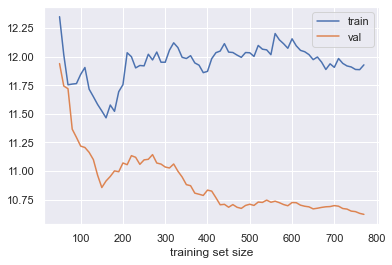

In [61]:
#Plot the learning curve
plot_learning_curves(lin_reg, Xtrain, ytrain)


With, linear regression, one can notice that in the beginning, at smaller sizes of training data, the model overfits
the training set performance is mainly below 6, while performance on validation is over 25 at very small sizes of training data;
 As the size of the training data increases, the validation set performance stabilizes very quickly and stays on the same level.
 The training set performance also plateaus at some point and does not change much any more.
 This indicates that with more training data the performance on the validation set improves.

The rmse is much better than the baseline , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and yhat represents predicted values

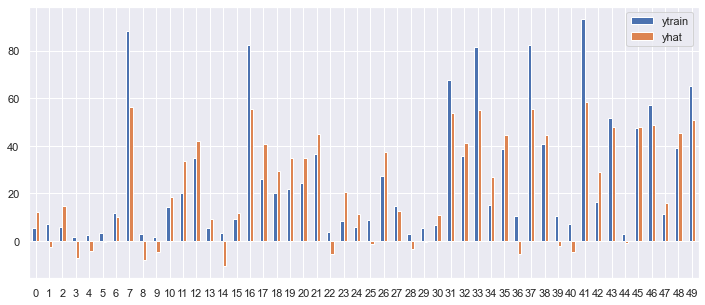

In [62]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)




We see that the predictions are quite reasonable, except for a few cases where the prediction either overshot or undershot the true value by a large amount.

We can retrieve specific instances where the absolute difference between the prediction and the true value was particularly big, say, over 70% of the true value:

In [63]:
cond_idx =np.abs(ytrain[:50] - yhat[:50])/ytrain[:50] > 0.7

In [64]:
cond_idx.sum()

22

We will create a scatter plot to visualise the predicted values versus their current values.

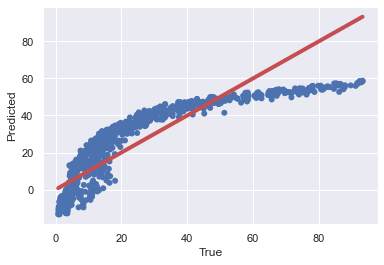

In [65]:
fig, ax = plt.subplots()
ax.scatter(ytrain, yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

The values seem to be more or less correctly predicted as they (yhat) follow the red line

<b>Most of the time, it seems like the predictions are accurate, so "Pickle" (save) the model so as not to re-train it

In [66]:
# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    #stores the model and can be reloaded and ran , so not required to retrain it
dump(lin_reg, 'models/lin_reg.joblib')

['models/lin_reg.joblib']

<b>10.2 Decision Tree

We will now proceed with decision tree model and understand the model accuracy.
<br>GridSearch will be used to tweak the decision tree hyperparameters. It will allow us to select the best hyperparameters for the algorithm from a set of possibilities.

In [67]:
#Using GridSearch and applying cross validations we will be able to search the best hyperparameters for the decision trees
# and thus cross-validation. 
#Applying and comparing several  hyperparameters combinations.

dtree_param_grid= {'min_samples_split': [2, 3, 4, 5], 'max_depth': [2, 4, 6, 8, None]}
#n_estimators: Number of trees in decision tree
#max_depth: Maximum number of levels in tree
# min_samples_split: Minimum number of samples required to split a node

Dtree_reg = DecisionTreeRegressor()
# start a timer
dt_start=time.time()

#Cross-validation with 10 splits
# we also want it to return the train score later
dtree_grid_search = GridSearchCV(Dtree_reg, dtree_param_grid, cv=10,
scoring='neg_mean_squared_error', return_train_score=True)

#We fit the training data to the best model (and thus estimators)
dtree_grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'min_samples_split': [2, 3, 4, 5]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
# details on the best model for the decision tree algorithm
best_dtree=dtree_grid_search.best_estimator_
best_dtree

DecisionTreeRegressor(min_samples_split=3)

The best decision tree model has a min_samples_split=5.
<br>
Now we will use validation to find the average accuracy score for this model.

In [69]:
dtree_cv_scores= cross_val_score(best_dtree, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
dtree_cv_rmse_scores = np.sqrt(-dtree_cv_scores)
func_display_model_scores(dtree_cv_rmse_scores)

Scores: [2.27017139 2.25264851 2.30735331 2.8101673  1.62475401 2.80012458
 2.24145016 2.71299093 2.34790233 1.83029258]
Accuracy: 2.3197855097028226
Standard deviation: 0.3691250489696932


The RMSE is 2.6 which is even better (lower) than the Linear regression model which was at 5.93 and baseline at 25.8

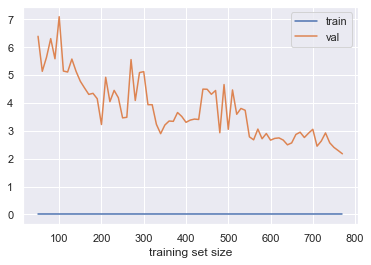

In [70]:
#Plot the learning curve
plot_learning_curves(Dtree_reg, Xtrain, ytrain)

With, decision tree,the model fits the validation set poorly and one can notice that the model <b>overfits</b> indicating that the model was unable to learn from the training data.However it is seen that the validation data is declining, indicative that with more training data, cross validation error will keep coming down.


In [71]:
# training and validation RMSE
dtree_val_scores = dtree_grid_search.cv_results_["mean_test_score"]
dtree_train_scores = dtree_grid_search.cv_results_["mean_train_score"]
dtree_params = dtree_grid_search.cv_results_["params"]
for dtree_val_score, dtree_train_score, dtree_param in zip(dtree_val_scores, dtree_train_scores, dtree_params):
    print(np.sqrt(-dtree_val_score), np.sqrt(-dtree_train_score), dtree_param)

8.257662918492649 7.646405760583238 {'max_depth': 2, 'min_samples_split': 2}
8.257662918492647 7.646405760583238 {'max_depth': 2, 'min_samples_split': 3}
8.257662918492647 7.646405760583238 {'max_depth': 2, 'min_samples_split': 4}
8.257662918492649 7.646405760583238 {'max_depth': 2, 'min_samples_split': 5}
4.813022076410794 4.158410548537218 {'max_depth': 4, 'min_samples_split': 2}
4.813022076410795 4.158410548537218 {'max_depth': 4, 'min_samples_split': 3}
4.813022076410795 4.158410548537218 {'max_depth': 4, 'min_samples_split': 4}
4.813022076410795 4.158410548537218 {'max_depth': 4, 'min_samples_split': 5}
2.949161047280714 2.0853732132552554 {'max_depth': 6, 'min_samples_split': 2}
2.934449308270359 2.0857135719873714 {'max_depth': 6, 'min_samples_split': 3}
2.9762465753777594 2.0874608454058006 {'max_depth': 6, 'min_samples_split': 4}
2.9477741928745878 2.093113038186344 {'max_depth': 6, 'min_samples_split': 5}
2.63224046577878 0.9544379496667225 {'max_depth': 8, 'min_samples_split

The model has performed well on the validation set though a little higher in comparision with the training set

In [72]:
dtree_rmse_score=np.sqrt(-dtree_grid_search.best_score_)
print(f'The best Decision Trees model has a RMSE of: {dtree_rmse_score}')

The best Decision Trees model has a RMSE of: 2.394244922237709


In [73]:
# let's predict on the training set
dtree_yhat= best_dtree.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
dt_duration = time.time() - dt_start
print(f'The Decision Trees model took {dt_duration:.3f} seconds')

The Decision Trees model took 4.342 seconds


So far,the rmse is much better than the baseline and linear regression  , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and dtree_yhat represents predicted values

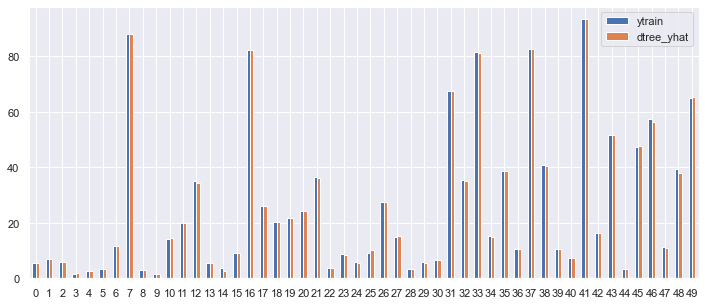

In [74]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "dtree_yhat": dtree_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

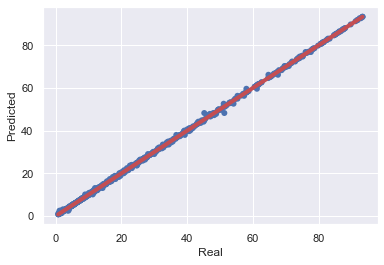

In [75]:
fig, ax = plt.subplots()
ax.scatter(ytrain, dtree_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

The values follow more closely on the red line in comparison to the linear regression model and seem to fit well.

In [76]:
# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    #stores the model and can be reloaded and ran , so not required to retrain it
dump(best_dtree, 'models/dtree_reg.joblib')

['models/dtree_reg.joblib']

<b>10.3 Random Forest

This time, we want to use Random Grid Search to get the optimal value for the hyperparameter. 
<br>It operates similarly to GridSearch, but we must also specify the number of random combinations to try.

In [77]:
# specify the hyperparameters and their values
# n_estimators = number of decision trees used in the random forest
# max depth : maximum number of levels in the trees
# min_samples_Split = Minimum number of samples required to split a node

param_grid = {'n_estimators': [3, 10, 20], 'max_depth': [2, 4, 6, 8, None]}
Rforest_reg = RandomForestRegressor()
# start a new timer
rf_start=time.time()
# we'll use 10-fold cross-validation with 10 random combinations to try
# we also want to get the train score for later
rf_random_grid_search = RandomizedSearchCV(Rforest_reg, param_grid, cv=10, n_iter=10, 
                                           scoring='neg_mean_squared_error', 
                                           random_state=8, return_train_score=True)
# fit the estimator on the training set
rf_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, None],
                                        'n_estimators': [3, 10, 20]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [78]:
# the best random forest model
best_rforest = rf_random_grid_search.best_estimator_
best_rforest

RandomForestRegressor(n_estimators=20)

The best model has 20 estimators .
<BR>
 We will now use cross-validation to find the average accuracy score for this model.

In [79]:
rf_cv_scores= cross_val_score(best_rforest, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)
func_display_model_scores(rf_cv_rmse_scores)

Scores: [1.64761984 2.05278357 1.97690538 2.22593381 1.37964933 2.31307689
 1.66438488 2.1604502  1.64137696 1.61219219]
Accuracy: 1.8674373055844495
Standard deviation: 0.3005075543555012


The RMSE is 1.86 which is even better (lower) than the decision tree , linear regression , baseline models which were at 2.62 , 5.93 and  25.8 respectively


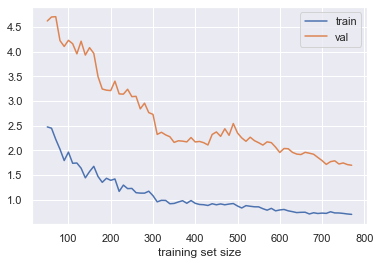

In [80]:
#Plot the learning curve
plot_learning_curves(Rforest_reg, Xtrain, ytrain)

With Random forest,the model fits the validation set poorly and one can notice that the model <b>overfits</b> indicating that the model was unable to learn from the training data.However it is seen that the validation data is declining, indicative that with more training data, cross validation error will keep coming down.

In [81]:
# training and validation of RMSE

val_scores = rf_random_grid_search.cv_results_["mean_test_score"]
train_scores = rf_random_grid_search.cv_results_["mean_train_score"]
params = rf_random_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

2.7739712131481724 1.9677192156410144 {'n_estimators': 3, 'max_depth': 6}
1.953494641664861 0.9735835300717078 {'n_estimators': 20, 'max_depth': 8}
7.352618766654036 6.885036919361089 {'n_estimators': 20, 'max_depth': 2}
2.3885605983849723 1.3106709226799766 {'n_estimators': 3, 'max_depth': None}
2.0301342195065426 0.8945762260250135 {'n_estimators': 10, 'max_depth': None}
2.0978426249358693 1.0675390551625648 {'n_estimators': 10, 'max_depth': 8}
2.4430007294696856 1.6859424821927982 {'n_estimators': 10, 'max_depth': 6}
7.7270577018532265 7.2938675570545595 {'n_estimators': 3, 'max_depth': 2}
1.9291812471484129 0.8029282568066948 {'n_estimators': 20, 'max_depth': None}
2.3664773856089405 1.602532402633151 {'n_estimators': 20, 'max_depth': 6}


The model has performed well on the validation set in comparision with the training set

In [82]:
# The best model's RMSE

rf_rmse_score=np.sqrt(-rf_random_grid_search.best_score_)
print(f'The best Random Forest model has a RMSE of: {rf_rmse_score}')

The best Random Forest model has a RMSE of: 1.9291812471484129


In [83]:
# let's predict on the training set
rforest_yhat = best_rforest.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
rf_duration = time.time() - rf_start
print(f'The Random Forest model took {rf_duration:.3f} seconds')

The Random Forest model took 50.675 seconds


So far,the rmse is much better than the baseline , linear regression and decision tree , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and rforest_yhat represents predicted values

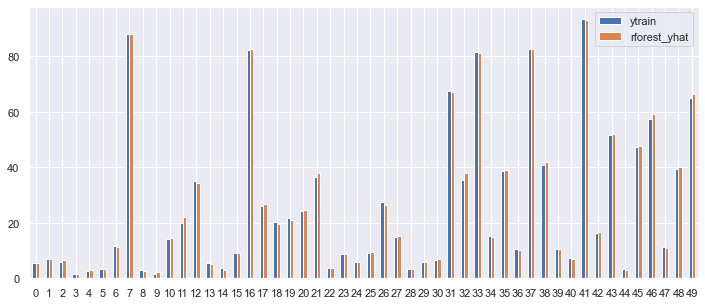

In [84]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "rforest_yhat": rforest_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

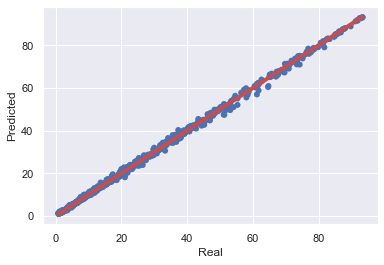

In [85]:
fig, ax = plt.subplots()
ax.scatter(ytrain, rforest_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In comparison to the other models shown above, the values follow the red line more closely

In [86]:
# save the model
dump(best_rforest, 'models/rforest_reg.joblib')

['models/rforest_reg.joblib']

<b>10.4 Support Vector Regression

GridSearch will be used to modify the hyperparameters of the Support Vector Regressor.

In [87]:
#Apply hyperparameter values
svr_param_grid = [
{'C': [1.0, 10, 100,10000],
'gamma': ["scale", "auto", 0.01, 0.1, 1, 3, 5, 10]
},
]
svr = SVR(kernel="rbf")
# start a new timer
svr_start = time.time()
#10 fold cross_validation and access to train score for later
sv_grid_search = GridSearchCV(svr, svr_param_grid, cv=10, scoring='neg_mean_squared_error',
return_train_score=True)
# fit the best model and hyperparameters to the training set
sv_grid_search.fit(Xtrain, ytrain)


GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [1.0, 10, 100, 10000],
                          'gamma': ['scale', 'auto', 0.01, 0.1, 1, 3, 5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
#Best svr model
best_svr = sv_grid_search.best_estimator_
best_svr

SVR(C=10000, gamma=1)

The best model has C=10000 and gamma= 0.01.<br>Now we will use the cross-validation to find the average accuracy score for this model

In [89]:
sv_cv_scores= cross_val_score(best_svr, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
sv_cv_rmse_scores = np.sqrt(-sv_cv_scores)
func_display_model_scores(sv_cv_rmse_scores)

Scores: [0.9548934  1.52541701 0.96682673 1.1049563  1.04874268 1.21834521
 1.70270743 1.47459149 0.81998632 1.28404899]
Accuracy: 1.2100515565272798
Standard deviation: 0.2704018172814046


The RMSE is 1.12 which is even better (lower) than the Random forest, decision tree , linear regression , baseline models which were at 1.9, 2.62 , 5.93 and 25.8 respectively

In [90]:
#training and validation RMSE
val_scores = sv_grid_search.cv_results_["mean_test_score"]
train_scores = sv_grid_search.cv_results_["mean_train_score"]
params = sv_grid_search.cv_results_["params"]
for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

12.760880980526961 12.60209055391746 {'C': 1.0, 'gamma': 'scale'}
12.760925120837415 12.602152121244812 {'C': 1.0, 'gamma': 'auto'}
19.076766756378962 19.049803155683325 {'C': 1.0, 'gamma': 0.01}
13.02815969709302 12.908766774312596 {'C': 1.0, 'gamma': 0.1}
16.083361688007788 15.662033112478873 {'C': 1.0, 'gamma': 1}
20.183467615837607 19.588825819621867 {'C': 1.0, 'gamma': 3}
21.98560362060839 21.339030265708846 {'C': 1.0, 'gamma': 5}
23.639970499385576 22.96070896934475 {'C': 1.0, 'gamma': 10}
6.414523128367807 5.966047959176325 {'C': 10, 'gamma': 'scale'}
6.414970932400871 5.965441482281522 {'C': 10, 'gamma': 'auto'}
13.136771948396193 13.014571611067893 {'C': 10, 'gamma': 0.01}
7.2732686483944535 6.908349477904006 {'C': 10, 'gamma': 0.1}
6.194990595885078 5.1196538865562085 {'C': 10, 'gamma': 1}
7.695661494690417 5.84822103333523 {'C': 10, 'gamma': 3}
8.8543426225896 6.508681910910326 {'C': 10, 'gamma': 5}
11.40561076506439 8.15413981788446 {'C': 10, 'gamma': 10}
3.2301512126675034

The performance on training and validation is almost similar which is 1.081 and 1.09 and close enough

In [91]:
# Best model RMSE
sv_rmse_score=np.sqrt(-sv_grid_search.best_score_)
print(f'The best SVR model has a RMSE of: {sv_rmse_score}')

The best SVR model has a RMSE of: 1.2398959279887882


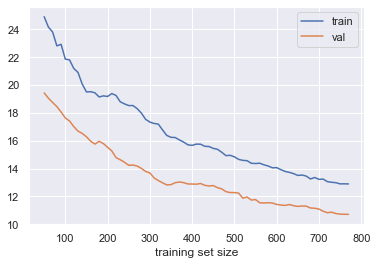

In [92]:
#Plot the learning curve
plot_learning_curves(svr, Xtrain, ytrain)

With, Support Vector Regressor,the model fits the validation set poorly and one can notice that the model <b>underfits</b> indicating that the model was unable to learn from the training data.

In [93]:
# let's predict on the training set
svr_yhat = best_svr.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
svr_duration = time.time() - svr_start
print(f'The SVR model took {svr_duration:.3f} seconds')

The SVR model took 2039.575 seconds


With every model the  rmse has become much better than all the above trained models , however we will visualize the predictions with the real values for 50 instances.
<br>
ytrain represents the current values  and svr_yhat represents predicted values

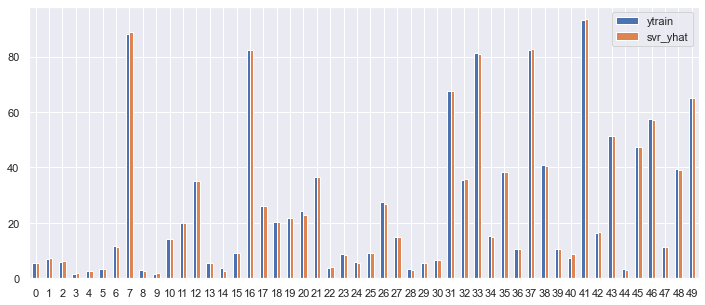

In [94]:
# create a temporary dataframe containing two columns
svr_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "svr_yhat": svr_yhat[:50]})
# plot the dataframe
svr_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

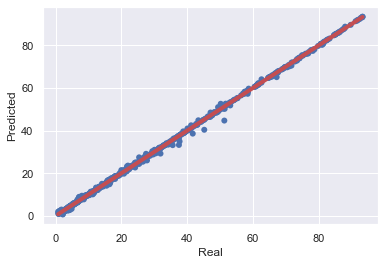

In [95]:
fig, ax = plt.subplots()
ax.scatter(ytrain, svr_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>The values seem to fit perfectly on the red line indicating to be so far the BEST model

In [96]:
# Save the model
dump(best_svr, 'models/svr_reg.joblib')

['models/svr_reg.joblib']

<b>10.5 Adaboost Regressor

Using Random Grid Search, we tweak the hyperparameter for the Adaboost Regressor.

In [97]:
adb_reg=AdaBoostRegressor()
#Apply hyper parameter values

adb_param_grid = {'n_estimators': [3, 10, 20, 50], 'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
1],
'loss' : ['linear', 'square', 'exponential']}

adb_reg=AdaBoostRegressor(random_state=8)
#start a new timer
adb_start = time.time()

# we'll use 10-fold cross-validation and want to have access to the train score
adb_random_grid_search = RandomizedSearchCV(adb_reg, adb_param_grid, cv=10, n_iter=10,
scoring='neg_mean_squared_error', random_state=8, return_train_score=True)

#fit the best model and hyperparameters to the training dataset
adb_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=8),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.25, 0.5, 0.75, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [3, 10, 20, 50]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [98]:
# the best model
best_adbr = adb_random_grid_search.best_estimator_
best_adbr

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=20,
                  random_state=8)

The best Adaboost Regressor model has 20 estimators, 8 for random state, a learning rate of 1 and loss=square<BR>
Now we will use cross-validation to find the average accuracy score for this model.

In [99]:
adb_cv_scores= cross_val_score(best_adbr, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
adb_cv_rmse_scores = np.sqrt(-adb_cv_scores)
func_display_model_scores(adb_cv_rmse_scores)

Scores: [3.68948192 4.6596164  4.08291311 4.65906458 3.67272516 4.8578092
 3.76054329 4.68935995 4.07356414 3.8772544 ]
Accuracy: 4.2022332155145214
Standard deviation: 0.44269103527779563


The RMSE is 4.21 which is more than the support vector (1.14), Random forest (1.9) and decision tree (2.62) models
however lower than the linear regression(5.93) and baseline (25.8) models 

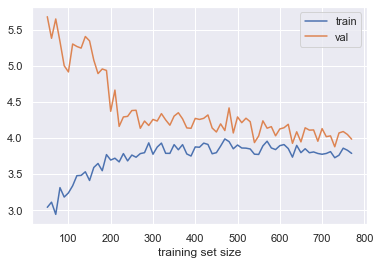

In [100]:
#Plot the learning curve
plot_learning_curves(adb_reg, Xtrain, ytrain)

With adaboost regressor,initially the model doesntlearning but with increase in the training set, the model is seen to be learning as the validation data is declining, indicating that with more training data, cross validation error will keep coming down.

In [101]:
# training and validation RMSE
adb_val_scores = adb_random_grid_search.cv_results_["mean_test_score"]
adb_train_scores = adb_random_grid_search.cv_results_["mean_train_score"]
adb_params = adb_random_grid_search.cv_results_["params"]
for adb_val_score, adb_train_score, adb_param in zip(adb_val_scores, adb_train_scores, adb_params):
    print(np.sqrt(-adb_val_score), np.sqrt(-adb_train_score), param)

5.852223237711084 5.438678649183575 {'C': 10000, 'gamma': 10}
5.4614504250351485 4.853124116303157 {'C': 10000, 'gamma': 10}
5.212716784596792 4.7076254486559135 {'C': 10000, 'gamma': 10}
5.058794425350604 4.651524644657044 {'C': 10000, 'gamma': 10}
5.875033014320228 5.312674657091574 {'C': 10000, 'gamma': 10}
4.38794725640224 3.950529397880947 {'C': 10000, 'gamma': 10}
4.225486877306429 3.8769359242024755 {'C': 10000, 'gamma': 10}
5.83448310624381 5.103957308071403 {'C': 10000, 'gamma': 10}
5.347559292086155 4.974742628112847 {'C': 10000, 'gamma': 10}
5.518452500555397 4.982872142487004 {'C': 10000, 'gamma': 10}


The performance on training and validation is almost similar 

In [102]:
#RMSE score
adb_rmse_score = np.sqrt(-adb_random_grid_search.best_score_)
print(f'The best Adaboost model has a RMSE of: {adb_rmse_score}')

The best Adaboost model has a RMSE of: 4.225486877306429


In [103]:
# let's predict on the training set
adbr_yhat = best_adbr.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
adb_duration = time.time() - adb_start
print(f'The Adaboost model took {adb_duration:.3f} seconds')

The Adaboost model took 17.773 seconds


We will visualize the predictions with the real values for 50 instances.
ytrain represents the current values and adbr_yhat represents predicted values

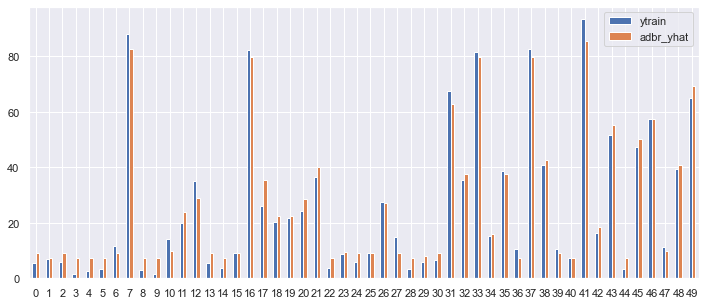

In [104]:
# create a temporary dataframe containing two columns
adb_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "adbr_yhat": adbr_yhat[:50]})
# plot the dataframe
adb_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

We will create a scatter plot to visualise the predicted values versus their current values.

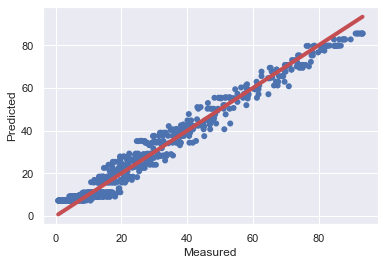

In [105]:
fig, ax = plt.subplots()
ax.scatter(ytrain, adbr_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [106]:
#Save the model
dump(best_adbr, 'models/adbr_reg.joblib')

['models/adbr_reg.joblib']

<b>10.6 Lasso Regressor

To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.

In [107]:

lasso_start=time.time()
#check the cross validation
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, random_state=0)
lasso_cv.fit(Xtrain, ytrain)

LassoCV(cv=10, max_iter=100000, random_state=0)

In [108]:
# get the optimal value of alpha parameter
alpha = lasso_cv.alpha_
alpha

0.0881496980292014

In [109]:
lasso = Lasso(alpha = alpha ,random_state=5)
lasso.fit(Xtrain, ytrain)

Lasso(alpha=0.0881496980292014, random_state=5)

In [110]:
# grid search hyperparameters for lasso regression


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define grid search for hyperparameter tuning
lasso_grid_search = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
                                 return_train_score=True)



In [111]:
# fit the estimator on the training set
lasso_grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Lasso(alpha=0.0881496980292014, random_state=5),
             n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0....41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [112]:
# the best estimator model
best_lasso = lasso_grid_search.best_estimator_
best_lasso

Lasso(alpha=0.99, random_state=5)

In [113]:
lasso_cv_scores= cross_val_score(best_lasso, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
lasso_cv_rmse_scores = np.sqrt(-lasso_cv_scores)
func_display_model_scores(lasso_cv_rmse_scores)

Scores: [12.10904026 14.15479182 11.56437969 11.43732625 11.23769342 10.7330055
 10.19720608 14.45460265 11.37567493 12.51502406]
Accuracy: 11.977874466286227
Standard deviation: 1.3142696466362311


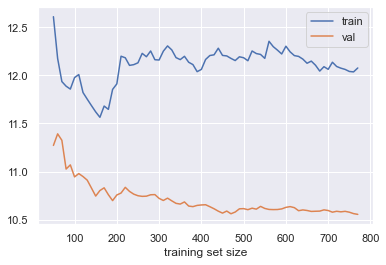

In [114]:
#Plot the learning curve
plot_learning_curves(best_lasso, Xtrain, ytrain)

In [115]:
#training and validation of RMSE
val_scores = lasso_grid_search.cv_results_["mean_test_score"]
train_scores = lasso_grid_search.cv_results_["mean_train_score"]
params = lasso_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

3.151723586887027 3.1356262737069054 {'alpha': 0.0}
3.1509651221145027 3.1351908791525225 {'alpha': 0.01}
3.1501883969219318 3.1347780654811452 {'alpha': 0.02}
3.149389559202562 3.1343862054951197 {'alpha': 0.03}
3.148636477996086 3.134007450207933 {'alpha': 0.04}
3.147861546647323 3.1336425526893703 {'alpha': 0.05}
3.1470878373778413 3.1332898958149076 {'alpha': 0.06}
3.146431913925133 3.1329370131389895 {'alpha': 0.07}
3.145859363100275 3.1325811827532277 {'alpha': 0.08}
3.145367959814143 3.1322184950450995 {'alpha': 0.09}
3.1449367489369378 3.1318545623589165 {'alpha': 0.1}
3.144505638099632 3.131492309906169 {'alpha': 0.11}
3.144079025314924 3.1311324410510544 {'alpha': 0.12}
3.1436752668485304 3.1307717789972322 {'alpha': 0.13}
3.1433015708050736 3.1304100565326425 {'alpha': 0.14}
3.142929604648858 3.1300512041997646 {'alpha': 0.15}
3.1425608634758806 3.1296944617256766 {'alpha': 0.16}
3.14219460447285 3.1293398530615537 {'alpha': 0.17}
3.141834073718371 3.1289863132310742 {'alpha

In [116]:
# The best model's RMSE

lasso_rmse_score=np.sqrt(-lasso_grid_search.best_score_)
print(f'The best Lasso Regressor model has a RMSE of: {lasso_rmse_score}')

The best Lasso Regressor model has a RMSE of: 3.1187532569406926


In [117]:
# let's predict on the training set
lasso_yhat = best_lasso.predict(Xtrain)
lasso_duration = time.time() - lasso_start

print(f'The Lasso model took {lasso_duration:.3f} seconds')

The Lasso model took 23.391 seconds


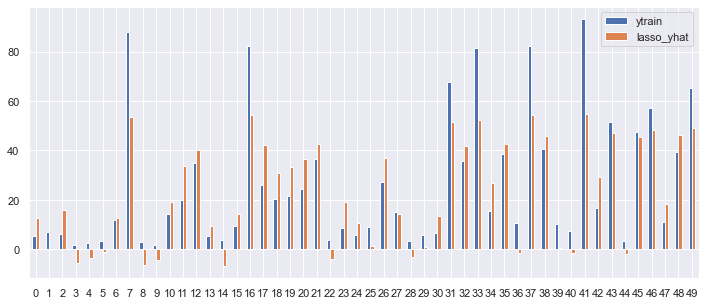

In [118]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "lasso_yhat": lasso_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

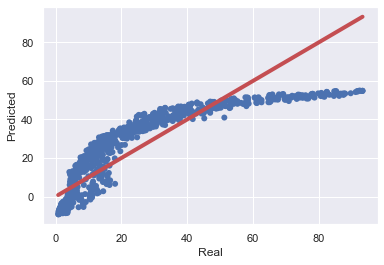

In [119]:
fig, ax = plt.subplots()
ax.scatter(ytrain, lasso_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [120]:
# save the model
dump(best_lasso, 'models/lasso_reg.joblib')

['models/lasso_reg.joblib']

<b>10.7 Ridge Regressor Model

In [121]:
ridge_start=time.time()

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(Xtrain, ytrain)

RidgeCV(alphas=array([2.77722793, 1.70427745, 3.34718147, 7.83165617, 4.25463348,
       6.68509803, 0.18051495, 4.95932186, 0.17471184, 6.65435282,
       2.81334241, 4.70130592, 5.83350002, 3.48850805, 6.86913069,
       1.56055424, 5.52204126, 2.367228  , 9.64645689, 2.81032643,
       6.88546528, 9.92747967, 1.82313217, 7.97012128, 0.41586472,
       5.13570324, 0.19575697, 4.18394913, 3.28923048, 0.74621173,
       5.60428668, 9.37594387, 6.0418729 , 8.73785645, 8.50439655,
       9.05623784, 0.60968182, 1.94431096, 0.71952471, 4.42363626,
       4.03546477, 2.40260444, 0.07546109, 1.08793421, 5.79490576,
       8.60031266, 7.46379367, 4.4350463 , 0.20048605, 5.9855731 ]),
        cv=10)

In [122]:
alpha = ridge_cv.alpha_
alpha

9.927479670467672

In [123]:
ridge = Ridge(alpha = alpha,random_state=5)
ridge.fit(Xtrain, ytrain)

Ridge(alpha=9.927479670467672, random_state=5)

In [124]:
scores = cross_val_score(ridge, Xtrain, ytrain, scoring='neg_mean_squared_error', 
                         cv=10)

ridge_cv_rmse_scores = np.sqrt(-scores)
func_display_model_scores(ridge_cv_rmse_scores.round(decimals=3))

Scores: [11.816 13.473 11.523 11.427 11.361 10.898 10.55  14.027 11.07  12.457]
Accuracy: 11.8602
Standard deviation: 1.071060483819658


In [125]:
# grid search hyperparameters for ridge regression


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define grid search for hyperparameter tuning
ridge_grid_search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
                                 return_train_score=True)


In [126]:
# fit the estimator on the training set
ridge_grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(alpha=9.927479670467672, random_state=5),
             n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.....41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [127]:
# the best estimator model
best_ridge = ridge_grid_search.best_estimator_
best_ridge

Ridge(alpha=0.99, random_state=5)

In [128]:
ridge_cv_scores= cross_val_score(best_ridge, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
ridge_cv_rmse_scores = np.sqrt(-ridge_cv_scores)
func_display_model_scores(ridge_cv_rmse_scores)

Scores: [11.81052306 13.42440376 11.50285235 11.46760125 11.39748661 10.97111247
 10.58160204 13.9822143  11.04877923 12.43250501]
Accuracy: 11.861908007850532
Standard deviation: 1.0420785767489593


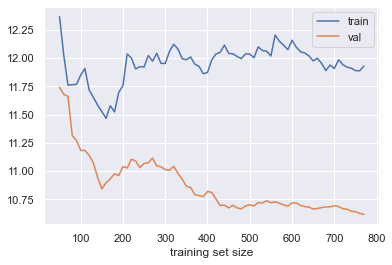

In [129]:
#Plot the learning curve
plot_learning_curves(best_ridge, Xtrain, ytrain)

In [130]:
#training and validation of RMSE
val_scores = ridge_grid_search.cv_results_["mean_test_score"]
train_scores = ridge_grid_search.cv_results_["mean_train_score"]
params = ridge_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

3.151723586887027 3.1356262737069054 {'alpha': 0.0}
3.1517151185000465 3.1356185299888026 {'alpha': 0.01}
3.151706650489857 3.1356107864632596 {'alpha': 0.02}
3.151698182856363 3.1356030431302684 {'alpha': 0.03}
3.151689715599468 3.135595299989819 {'alpha': 0.04}
3.1516812487190764 3.135587557041902 {'alpha': 0.05}
3.1516727822150923 3.135579814865159 {'alpha': 0.06}
3.1516643160874196 3.13557207642075 {'alpha': 0.07}
3.151655850335962 3.1355643381686735 {'alpha': 0.08}
3.151647384960624 3.1355566001089197 {'alpha': 0.09}
3.1516389199613104 3.13554886224148 {'alpha': 0.1}
3.151630455337925 3.1355411245663434 {'alpha': 0.11}
3.151621991090372 3.1355333870835023 {'alpha': 0.12}
3.1516135272185566 3.1355256497929465 {'alpha': 0.13}
3.1516050637223816 3.1355179126946666 {'alpha': 0.14}
3.1515966006017533 3.1355101757886534 {'alpha': 0.15}
3.1515881378565753 3.1355024390748976 {'alpha': 0.16}
3.1515796754867536 3.1354947025533897 {'alpha': 0.17}
3.1515712134921907 3.13548696622412 {'alpha':

In [131]:
# The best model's RMSE

ridge_rmse_score=np.sqrt(-ridge_grid_search.best_score_)
print(f'The best Ridge Regressor model has a RMSE of: {ridge_rmse_score}')

The best Ridge Regressor model has a RMSE of: 3.150888292282516


In [132]:
# let's predict on the training set
ridge_yhat = best_ridge.predict(Xtrain)
ridge_duration = time.time() - ridge_start

print(f'The Ridge model took {ridge_duration:.3f} seconds')

The Ridge model took 19.263 seconds


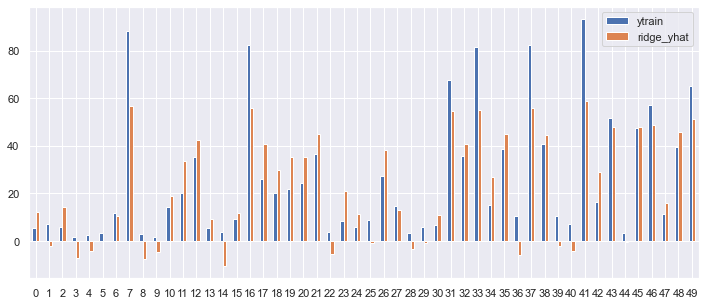

In [133]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "ridge_yhat": ridge_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

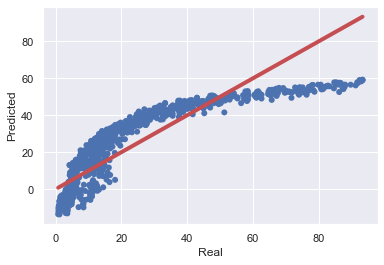

In [134]:
fig, ax = plt.subplots()
ax.scatter(ytrain, ridge_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [135]:
# save the model
dump(best_ridge, 'models/ridge_reg.joblib')

['models/ridge_reg.joblib']

<b>10.8 XGBoost Regressor

In [136]:
param_grid = {'n_estimators': [1000, 1500],'learning_rate': [0.01, 0.03,0.05] , 'max_depth': [3,6,9]}

xgb_reg = XGBRegressor()
# start a new timer
xgb_start=time.time()

xgb_grid_search = RandomizedSearchCV(xgb_reg, param_grid, cv=10, n_iter=10, 
                                           scoring='neg_mean_squared_error', 
                                           random_state=8, return_train_score=True)
# fit the estimator on the training set
xgb_grid_search.fit(Xtrain, ytrain)



RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [1000, 1500]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [137]:
# the best random forest model
best_xgb = xgb_grid_search.best_estimator_
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [138]:
xgb_cv_scores= cross_val_score(best_xgb, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
xgb_cv_rmse_scores = np.sqrt(-xgb_cv_scores)
func_display_model_scores(xgb_cv_rmse_scores)

Scores: [1.07245826 1.71004068 1.10987455 1.26831424 0.81488624 1.39340072
 1.39431403 1.44970334 0.97233001 1.04263525]
Accuracy: 1.2227957316396316
Standard deviation: 0.25424885374013445


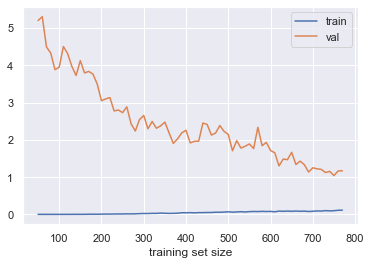

In [139]:
#Plot the learning curve
plot_learning_curves(xgb_reg, Xtrain, ytrain)

In [140]:
#training and validation of RMSE

val_scores = xgb_grid_search.cv_results_["mean_test_score"]
train_scores = xgb_grid_search.cv_results_["mean_train_score"]
params = xgb_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)


1.2517669140884438 0.03827839751611122 {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.05}
1.4319180859621163 0.7442157475332815 {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.03}
1.3175039615366142 0.0033198193580812174 {'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.05}
1.304699520324703 0.003484519905359517 {'n_estimators': 1500, 'max_depth': 9, 'learning_rate': 0.03}
1.337216257031097 0.0610588950735835 {'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.01}
1.3458253432785063 0.5752942689590951 {'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.03}
1.3278631568203065 0.3057792668880332 {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01}
1.3525686199805578 0.5288334914584482 {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05}
1.6432273884367934 1.0619097399947834 {'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01}
1.2489483099569312 0.014618837337465631 {'n_estimators': 1500, 'max_depth': 6, 'learning_rate': 

In [141]:
# The best model's RMSE
xgb_rmse_scores=np.sqrt(-xgb_grid_search.best_score_)
print(f'The best XGBoost Regressor model has a RMSE of: {xgb_rmse_scores}')


The best XGBoost Regressor model has a RMSE of: 1.2489483099569312


In [142]:
# let's predict on the training set
xgb_yhat = best_xgb.predict(Xtrain)
xgb_duration = time.time() - xgb_start

print(f'The Gradient Boost model took {xgb_duration:.3f} seconds')

The Gradient Boost model took 423.535 seconds


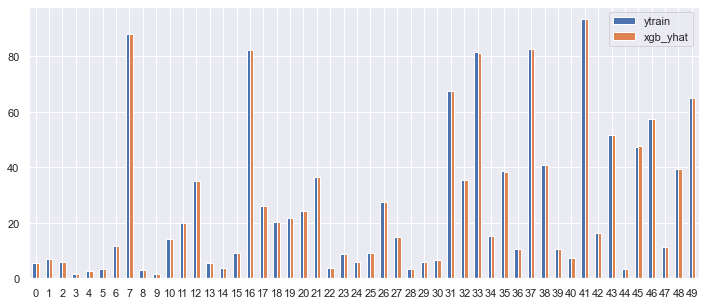

In [143]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "xgb_yhat": xgb_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

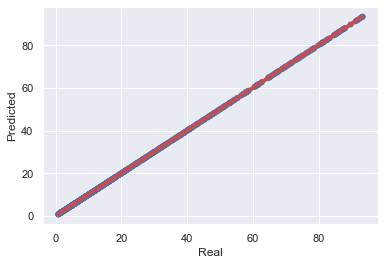

In [144]:
fig, ax = plt.subplots()
ax.scatter(ytrain, xgb_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [145]:
# save the model
dump(best_xgb, 'models/xgb_reg.joblib')

['models/xgb_reg.joblib']

<b>10.9 Gradient Boost Regressor

In [146]:
param_grid = {'n_estimators': [300,500,1000, 1500],'learning_rate': [0.01, 0.03,0.05] , 'max_depth': [3,6,9]}

gbr_reg = GradientBoostingRegressor()
# start a new timer
gbr_start=time.time()

gbr_grid_search = RandomizedSearchCV(gbr_reg, param_grid, cv=10, n_iter=10, 
                                           scoring='neg_mean_squared_error', 
                                           random_state=8, return_train_score=True)
# fit the estimator on the training set
gbr_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [300, 500, 1000, 1500]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [147]:
# the best random forest model
best_gbr = gbr_grid_search.best_estimator_
best_gbr

GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=1000)

In [148]:
gbr_cv_scores= cross_val_score(best_gbr, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
gbr_cv_rmse_scores = np.sqrt(-gbr_cv_scores)
func_display_model_scores(gbr_cv_rmse_scores)


Scores: [1.37812576 1.84143504 1.60559257 1.67303168 0.90182579 1.47889738
 1.35538614 1.53147472 1.13742429 1.0591    ]
Accuracy: 1.3962293374169414
Standard deviation: 0.2776423869338257


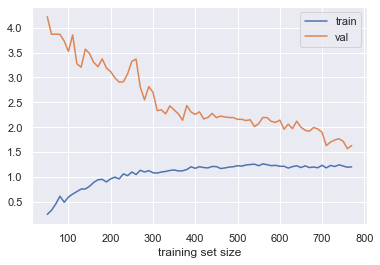

In [149]:
#Plot the learning curve
plot_learning_curves(gbr_reg, Xtrain, ytrain)


In [150]:
#training and validation of RMSE

val_scores = gbr_grid_search.cv_results_["mean_test_score"]
train_scores = gbr_grid_search.cv_results_["mean_train_score"]
params = gbr_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)




3.044069467319079 2.5925423372319703 {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}
1.6373296141945983 1.0226167727557376 {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}
1.4823185310213847 0.7707543962802311 {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05}
1.9811352580148918 0.004550592179810239 {'n_estimators': 1500, 'max_depth': 9, 'learning_rate': 0.01}
1.4596864632467956 0.1388581808083181 {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05}
2.1535070492740847 1.6312840910878326 {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
1.4300882548311555 0.048817330574242535 {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.03}
1.9994168466953686 0.00025080584258889183 {'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.03}
1.4559018077025379 0.14517359362934626 {'n_estimators': 1500, 'max_depth': 6, 'learning_rate': 0.01}
1.9930850916792886 3.101270941645075e-05 {'n_estimators': 1500, 'max_depth': 9, 'learning_rate': 

In [151]:
# The best model's RMSE

gbr_rmse_score=np.sqrt(-gbr_grid_search.best_score_)
print(f'The best Gradient Boost regressor model has a RMSE of: {gbr_rmse_score}')


The best Gradient Boost regressor model has a RMSE of: 1.4300882548311555


In [152]:
# let's predict on the training set
gbr_yhat = best_gbr.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
gbr_duration = time.time() - gbr_start
print(f'The Gradient Boost Regressor model took {gbr_duration:.3f} seconds')


The Gradient Boost Regressor model took 726.318 seconds


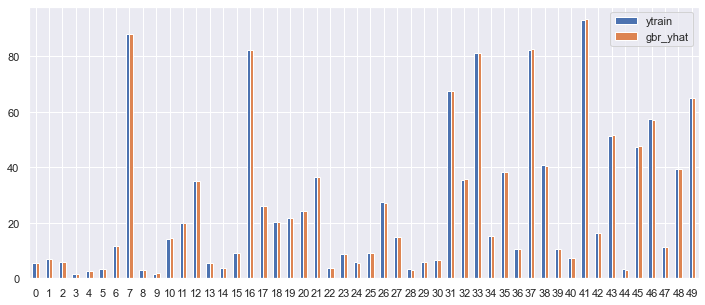

In [153]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "gbr_yhat": gbr_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)


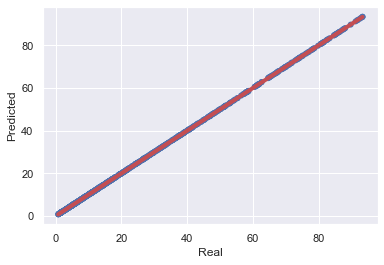

In [154]:
fig, ax = plt.subplots()
ax.scatter(ytrain, gbr_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [155]:
# save the model
dump(best_gbr, 'models/gbr_reg.joblib')

['models/gbr_reg.joblib']

<b>10.10 Stochastic Gradient Descent (SGD) Regressor

In [156]:
sgd_reg = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }

# start a new timer
sgd_start=time.time()

sgd_grid_search = GridSearchCV(sgd_reg, parameters, cv=10, verbose=1,  
                        scoring = 'neg_mean_squared_error',  return_train_score=True)

# fit the estimator on the training set
sgd_grid_search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'alpha': [1e-05], 'epsilon': [0.01],
                         'fit_intercept': [True], 'max_iter': [10000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [157]:
# the best random forest model
best_sgd = sgd_grid_search.best_estimator_
best_sgd

SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)

In [158]:
sgd_cv_scores= cross_val_score(best_sgd, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
sgd_cv_rmse_scores = np.sqrt(-sgd_cv_scores)
func_display_model_scores(sgd_cv_rmse_scores)

Scores: [11.78406444 13.43462603 11.49959246 11.46043763 11.40235581 10.94622219
 10.55826343 13.97887158 11.01028458 12.40281853]
Accuracy: 11.847753668480062
Standard deviation: 1.0496898839044884


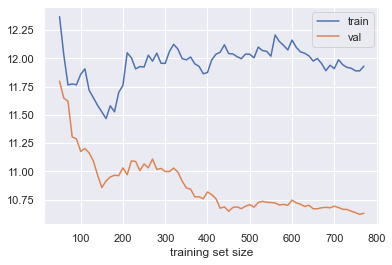

In [159]:
#Plot the learning curve
plot_learning_curves(sgd_reg, Xtrain, ytrain)

In [160]:
#training and validation of RMSE

val_scores = sgd_grid_search.cv_results_["mean_test_score"]
train_scores = sgd_grid_search.cv_results_["mean_train_score"]
params = sgd_grid_search.cv_results_["params"]

for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)


11.90960033793283 11.781411344868953 {'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}


In [161]:
# The best model's RMSE

sgd_rmse_score=np.sqrt(-sgd_grid_search.best_score_)
print(f'The best Stochastic Gradient Descent regressor model has a RMSE of: {sgd_rmse_score}')


The best Stochastic Gradient Descent regressor model has a RMSE of: 11.90960033793283


In [162]:
# let's predict on the training set
sgd_yhat = best_sgd.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
sgd_duration = time.time() - sgd_start
print(f'The Stochastic Gradient Descent  Regressor model took {sgd_duration:.3f} seconds')

The Stochastic Gradient Descent  Regressor model took 4.024 seconds


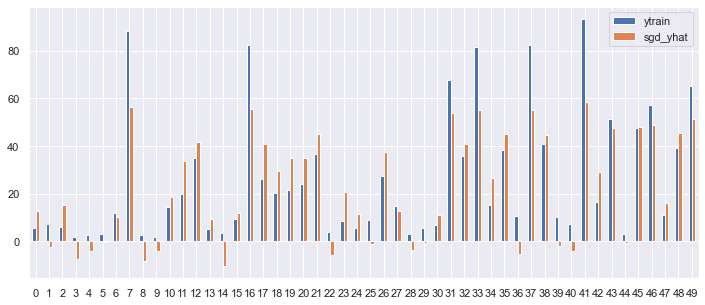

In [163]:
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "sgd_yhat": sgd_yhat[:50]})
# plot the dataframe
dt_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)


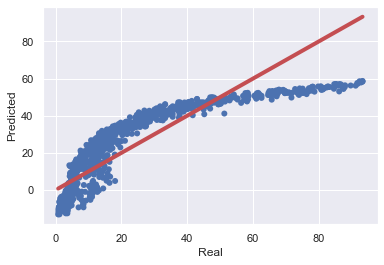

In [164]:
fig, ax = plt.subplots()
ax.scatter(ytrain, sgd_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [165]:
# save the model
dump(best_sgd, 'models/sgd_reg.joblib')

['models/sgd_reg.joblib']

<b>10.11 Comparing the models

<b>Comparing in terms of speed of execution of the models


In [166]:
print(f'Decision Trees: {dt_duration:.3f} seconds')
print(f'Random Forest: {rf_duration:.3f} seconds')
print(f'Support Vector Machine Regressor: {svr_duration:.3f} seconds')
print(f'Adaboost: {adb_duration:.3f} seconds')
print(f'Lasso: {lasso_duration:.3f} seconds')
print(f'Ridge: {ridge_duration:.3f} seconds')
print(f'XGBoost: {xgb_duration:.3f} seconds')
print(f'Gradient Boost: {gbr_duration:.3f} seconds')
print(f'Stochastic Gradient Descent : {sgd_duration:.3f} seconds')

Decision Trees: 4.342 seconds
Random Forest: 50.675 seconds
Support Vector Machine Regressor: 2039.575 seconds
Adaboost: 17.773 seconds
Lasso: 23.391 seconds
Ridge: 19.263 seconds
XGBoost: 423.535 seconds
Gradient Boost: 726.318 seconds
Stochastic Gradient Descent : 4.024 seconds


In comparison of the time taken to execute the models, Decision Tree  was the fastest whereas Gradient Boost was the slowest of all

<b>Comparing in terms of their cross-validation scores

In [167]:
print('Linear Regression')
func_display_model_scores(rmse_lin_scores)
print('')
print('Decision Trees')
func_display_model_scores(dtree_cv_rmse_scores)
print('')
print('Random Forest')
func_display_model_scores(rf_cv_rmse_scores)
print('')
print('Support Vector Regression')
func_display_model_scores(sv_cv_rmse_scores)
print('')
print('AdaBoost Regressor')
func_display_model_scores(adb_cv_rmse_scores)
print('')
print('Lasso Regressor')
func_display_model_scores(lasso_cv_rmse_scores)
print('')
print('Ridge Regressor')
func_display_model_scores(ridge_cv_rmse_scores)
print('')
print('XGB Regressor')
func_display_model_scores(xgb_cv_rmse_scores)
print('')
print('Gradient Boost Regressor')
func_display_model_scores(gbr_cv_rmse_scores)
print('')
print('Stochastic Gradient Descent Regressor')
func_display_model_scores(sgd_cv_rmse_scores)

Linear Regression
Scores: [11.81016955 13.41914106 11.50100202 11.47250209 11.40199546 10.9796599
 10.5854406  13.97739513 11.04669615 12.43001696]
Accuracy: 11.86240189055753
Standard deviation: 1.0388163248492817

Decision Trees
Scores: [2.27017139 2.25264851 2.30735331 2.8101673  1.62475401 2.80012458
 2.24145016 2.71299093 2.34790233 1.83029258]
Accuracy: 2.3197855097028226
Standard deviation: 0.3691250489696932

Random Forest
Scores: [1.64761984 2.05278357 1.97690538 2.22593381 1.37964933 2.31307689
 1.66438488 2.1604502  1.64137696 1.61219219]
Accuracy: 1.8674373055844495
Standard deviation: 0.3005075543555012

Support Vector Regression
Scores: [0.9548934  1.52541701 0.96682673 1.1049563  1.04874268 1.21834521
 1.70270743 1.47459149 0.81998632 1.28404899]
Accuracy: 1.2100515565272798
Standard deviation: 0.2704018172814046

AdaBoost Regressor
Scores: [3.68948192 4.6596164  4.08291311 4.65906458 3.67272516 4.8578092
 3.76054329 4.68935995 4.07356414 3.8772544 ]
Accuracy: 4.20223321

Looking at the cross validation , Support Vector Regression model has the best accuracy followed by XGB Regressor
whereas Linear regression model has the worst accuracy followed by Ridge Regressor model.
<br>
<br>
Next we will compare the RMSE of each model against the baseline.

In [168]:
RMSE = {
    'Baseline ' : [baseline_rmse],
    'Linear Regression' : [rmse_lin_scores.mean()],
    'Decision Trees' : [dtree_rmse_score],
    'Random Forest' : [rf_rmse_score],
    'Support Vector Regression' : [sv_rmse_score],
    'AdaBoost Regressor' : [adb_rmse_score],
    'Lasso Regressor' : [lasso_rmse_score],
    'Ridge Regressor' : [ridge_rmse_score],
    'XGBoost Regressor' : [xgb_rmse_scores],
    'Gradient Boost Regressor' : [gbr_rmse_score],
    'Stochastic Gradient Descent Regressor' : [sgd_rmse_score]
    
}

scores_df = pd.DataFrame(RMSE).transpose()
scores_df.columns=['RMSE']
scores_df["Vs Baseline"] = 100*(baseline_rmse - scores_df["RMSE"] )/baseline_rmse
scores_df

,RMSE,Vs Baseline
Baseline,25.817704,0.000000
Linear Regression,11.862402,54.053227
Decision Trees,2.394245,90.726345
Random Forest,1.929181,92.527681
Support Vector Regression,1.239896,95.197497
AdaBoost Regressor,4.225487,83.633375
Lasso Regressor,3.118753,87.920098
Ridge Regressor,3.150888,87.795629
XGBoost Regressor,1.248948,95.162435
Gradient Boost Regressor,1.430088,94.460823


The best model seems to be <b>Support Vector Regression</b> model followed by <b>XGBoost</b>

## 11. Model Evaluation on test data

We will evaluate the models on the test data

In [169]:
#Load the models
lin_reg = load("models/lin_reg.joblib")
best_dtree = load("models/dtree_reg.joblib")
best_rforest = load("models/rforest_reg.joblib")
best_svr=load("models/svr_reg.joblib")
best_adbr=load("models/adbr_reg.joblib")
best_lasso=load("models/lasso_reg.joblib")
best_ridge=load("models/ridge_reg.joblib")
best_xgb=load("models/xgb_reg.joblib")
best_gbr=load("models/gbr_reg.joblib")
best_sgd=load("models/sgd_reg.joblib")

<b>11.1 Linear Regression on test data

In [170]:
#Predict the Support Vector Regression Model using test dataset
lin_yhat_test = lin_reg.predict(Xtest)
lin_test_rmse = np.sqrt(mean_squared_error(ytest,lin_yhat_test))
print(f'Linear Regression Test RMSE: {lin_test_rmse}')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ASMR
Feature names seen at fit time, yet now missing:
- Age_10 to 14
- Age_15 to 19
- Age_20 to 24
- Age_25 to 29
- Age_30 to 34
- ...


In [ ]:
#Defining MAPE function to estimate the error value in the predictions
#use numpy.abs() function to find the absolute value of the differences
def func_MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
LR_MAPE= func_MAPE(ytest,lin_yhat_test)
print("MAPE: ",LR_MAPE)

In [ ]:
# create a temporary dataframe containing two columns
lin_df_tmp = pd.DataFrame({"ytest": ytest[:50], "lin_yhat_test": lin_yhat_test[:50]})
# plot the dataframe
lin_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ytest, lin_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.2 Decision tree on test data

In [ ]:
#Predict the Decision Tree Model using test dataset
dtree_yhat_test = best_dtree.predict(Xtest)
dtree_test_rmse = np.sqrt(mean_squared_error(ytest,dtree_yhat_test))
print(f'Decision Tree Test RMSE: {dtree_test_rmse}')

In [ ]:
DTree_MAPE= func_MAPE(ytest,dtree_yhat_test)
print("MAPE: ",DTree_MAPE)

In [ ]:
# create a temporary dataframe containing two columns
dtree_df_tmp = pd.DataFrame({"ytest": ytest[:50], "dtree_yhat_test": dtree_yhat_test[:50]})
# plot the dataframe
dtree_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ytest, dtree_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.3 Random Forest on test data

In [ ]:
#Predict the Random Forest Model using test dataset
rf_yhat_test = best_rforest.predict(Xtest)
rf_test_rmse = np.sqrt(mean_squared_error(ytest,rf_yhat_test))
print(f'Random Forest Test RMSE: {rf_test_rmse}')

In [ ]:
Rf_MAPE= func_MAPE(ytest,rf_yhat_test)
print("MAPE: ",Rf_MAPE)

In [ ]:
# create a temporary dataframe containing two columns
rf_df_tmp = pd.DataFrame({"ytest": ytest[:50], "rf_yhat_test": rf_yhat_test[:50]})
# plot the dataframe
rf_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ytest, rf_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
rf_df_tmp1 = pd.DataFrame({"Actual": ytest[:50], "Predicted": rf_yhat_test[:50]})
# plot the dataframe
rf_df_tmp1

<b>11.4 Support Vector Regression on test data

In [459]:
#Predict the Support Vector Regression Model using test dataset
svr_yhat_test = best_svr.predict(Xtest)
svr_test_rmse = np.sqrt(mean_squared_error(ytest,svr_yhat_test))
print(f'Support Vector Test RMSE: {svr_test_rmse}')

Support Vector Test RMSE: 1.5996024989398527


In [460]:
SVR_MAPE= func_MAPE(ytest,svr_yhat_test)
print("MAPE: ",SVR_MAPE)

MAPE:  23.93177302428334


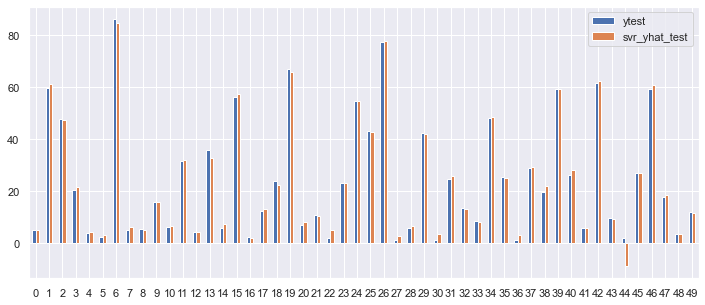

In [461]:
# create a temporary dataframe containing two columns
svr_df_tmp = pd.DataFrame({"ytest": ytest[:50], "svr_yhat_test": svr_yhat_test[:50]})
# plot the dataframe
svr_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

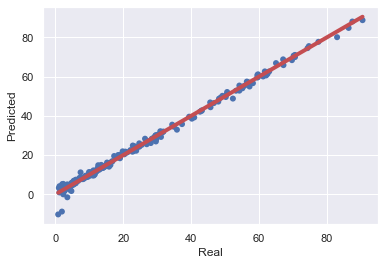

In [462]:
fig, ax = plt.subplots()
ax.scatter(ytest, svr_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.5 AdaBoost Regressor on test data

In [463]:
#Predict the AdaBoost Regressor Model using test dataset
adb_yhat_test = best_adbr.predict(Xtest)
adb_test_rmse = np.sqrt(mean_squared_error(ytest,adb_yhat_test))
print(f'AdaBoost Regressor Test RMSE: {adb_test_rmse}')

AdaBoost Regressor Test RMSE: 4.467166735455467


In [464]:
adb_MAPE= func_MAPE(ytest,adb_yhat_test)
print("MAPE: ",adb_MAPE)

MAPE:  60.64385442858061


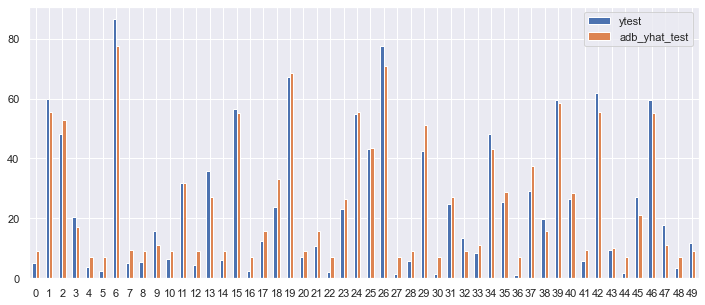

In [465]:
# create a temporary dataframe containing two columns
adb_df_tmp = pd.DataFrame({"ytest": ytest[:50], "adb_yhat_test": adb_yhat_test[:50]})
# plot the dataframe
adb_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

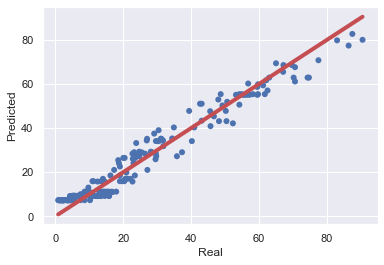

In [466]:
fig, ax = plt.subplots()
ax.scatter(ytest, adb_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.6 Lasso Regression on test data

In [467]:
#Predict the Lasso Regressor Model using test dataset
lasso_yhat_test = best_lasso.predict(Xtest)
lasso_test_rmse = np.sqrt(mean_squared_error(ytest,lasso_yhat_test))
print(f'Lasso Regressor Test RMSE: {lasso_test_rmse}')

Lasso Regressor Test RMSE: 10.931596493672975


In [468]:
lasso_MAPE= func_MAPE(ytest,lasso_yhat_test)
print("MAPE: ",lasso_MAPE)

MAPE:  103.9604433252119


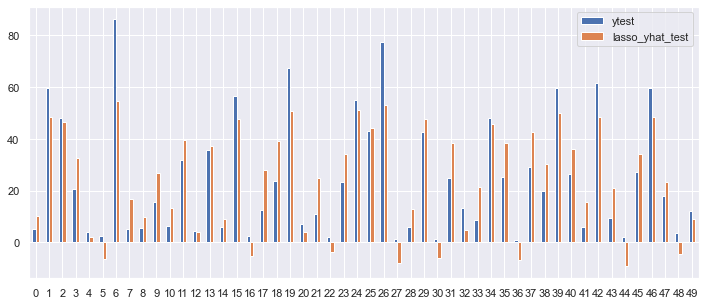

In [469]:
# create a temporary dataframe containing two columns
lasso_df_tmp = pd.DataFrame({"ytest": ytest[:50], "lasso_yhat_test": lasso_yhat_test[:50]})
# plot the dataframe
lasso_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

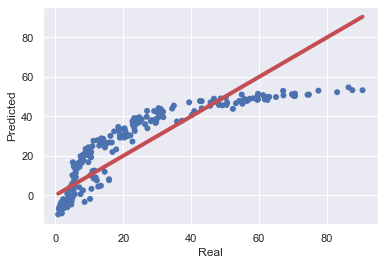

In [470]:
fig, ax = plt.subplots()
ax.scatter(ytest, lasso_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.7 Ridge Regression on test data

In [471]:
#Predict the Ridge Regressor Model using test dataset
ridge_yhat_test = best_ridge.predict(Xtest)
ridge_test_rmse = np.sqrt(mean_squared_error(ytest,ridge_yhat_test))
print(f'Ridge Regressor Test RMSE: {ridge_test_rmse}')

Ridge Regressor Test RMSE: 10.894948577793304


In [472]:
ridge_MAPE= func_MAPE(ytest,ridge_yhat_test)
print("MAPE: ",ridge_MAPE)

MAPE:  118.54592081315644


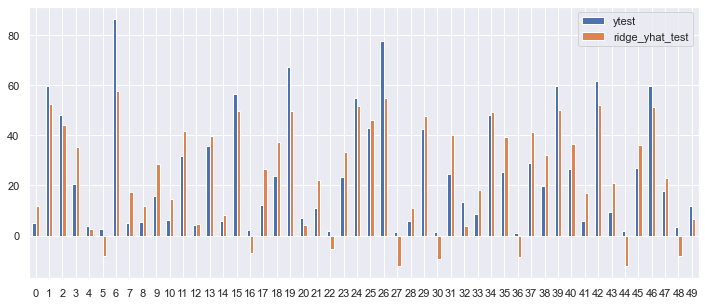

In [473]:
# create a temporary dataframe containing two columns
ridge_df_tmp = pd.DataFrame({"ytest": ytest[:50], "ridge_yhat_test": ridge_yhat_test[:50]})
# plot the dataframe
ridge_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

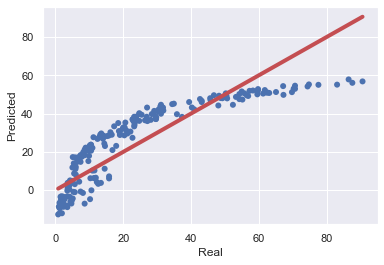

In [474]:
fig, ax = plt.subplots()
ax.scatter(ytest, ridge_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.8 XGBoost Regression on test data

In [475]:
#Predict the XGBoost Regressor Model using test dataset
xgb_yhat_test = best_xgb.predict(Xtest)
xgb_test_rmse = np.sqrt(mean_squared_error(ytest,xgb_yhat_test))
print(f'XGBoost Regressor Test RMSE: {xgb_test_rmse}')

XGBoost Regressor Test RMSE: 1.5736512258818751


In [476]:
xgb_MAPE= func_MAPE(ytest,xgb_yhat_test)
print("MAPE: ",xgb_MAPE)

MAPE:  12.33182789272947


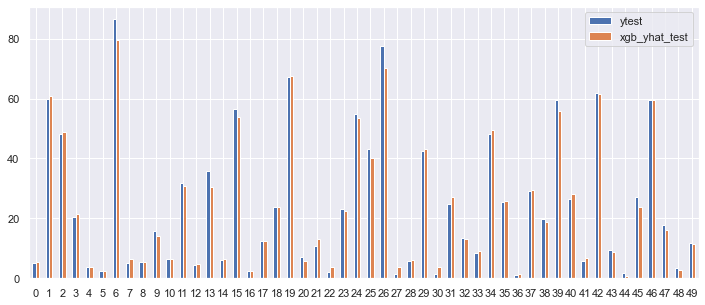

In [477]:
# create a temporary dataframe containing two columns
xgb_df_tmp = pd.DataFrame({"ytest": ytest[:50], "xgb_yhat_test": xgb_yhat_test[:50]})
# plot the dataframe
xgb_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

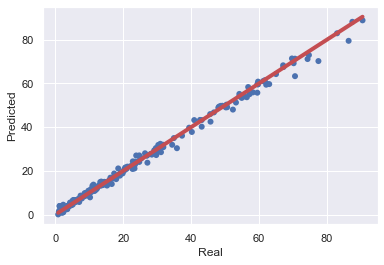

In [478]:
fig, ax = plt.subplots()
ax.scatter(ytest, xgb_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.9 Gradient Boost Regressor on test data

In [479]:
#Predict the Gradient Descent Regressor Model using test dataset
gbr_yhat_test = best_gbr.predict(Xtest)
gbr_test_rmse = np.sqrt(mean_squared_error(ytest,gbr_yhat_test))
print(f'Gradient Boost Regressor Test RMSE: {gbr_test_rmse}')

Gradient Boost Regressor Test RMSE: 1.5984128615212243


In [480]:
gbr_MAPE= func_MAPE(ytest,gbr_yhat_test)
print("MAPE: ",gbr_MAPE)

MAPE:  12.247160194754803


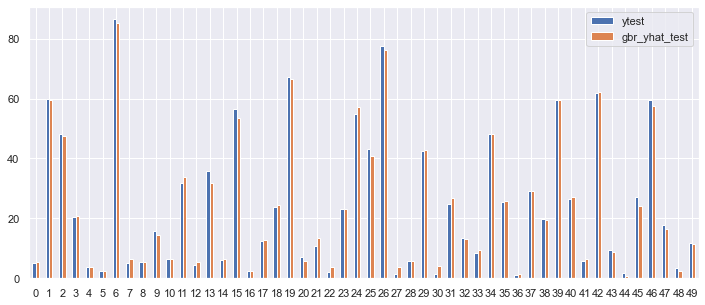

In [481]:
# create a temporary dataframe containing two columns
gbr_df_tmp = pd.DataFrame({"ytest": ytest[:50], "gbr_yhat_test": gbr_yhat_test[:50]})
# plot the dataframe
gbr_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

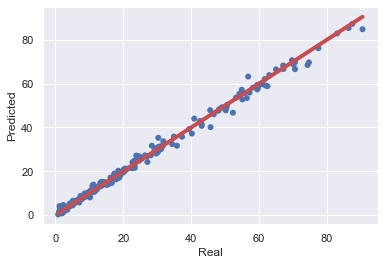

In [482]:
fig, ax = plt.subplots()
ax.scatter(ytest, gbr_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

<b>11.10 Stochastic Gradient Descent Regressor on test data

In [483]:
#Predict the Gradient Descent Regressor Model using test dataset
sgd_yhat_test = best_sgd.predict(Xtest)
sgd_test_rmse = np.sqrt(mean_squared_error(ytest,sgd_yhat_test))
print(f'Stochastic Gradient Descent Regressor Test RMSE: {sgd_test_rmse}')

Stochastic Gradient Descent Regressor Test RMSE: 10.907746204151339


In [484]:
sgd_MAPE= func_MAPE(ytest,sgd_yhat_test)
print("MAPE: ",sgd_MAPE)

MAPE:  119.72565632807384


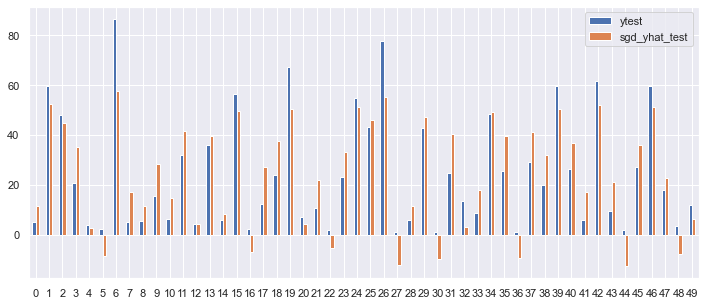

In [485]:
# create a temporary dataframe containing two columns
sgd_df_tmp = pd.DataFrame({"ytest": ytest[:50], "sgd_yhat_test": sgd_yhat_test[:50]})
# plot the dataframe
sgd_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

In [486]:
sgd_df=pd.DataFrame({"ytest": ytest, "sgd_yhat_test": sgd_yhat_test})

In [487]:
sgd_df

,ytest,sgd_yhat_test
0,5.0,11.656931
1,59.7,52.149014
2,48.0,44.834176
3,20.6,35.136350
4,3.8,2.546997
...,...,...
211,1.7,-6.036949
212,7.8,17.467894
213,10.2,-5.071409
214,22.7,37.370103


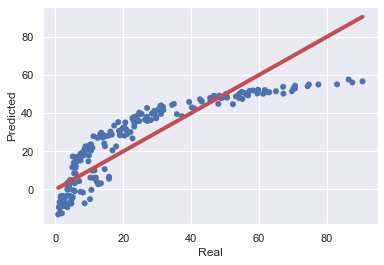

In [488]:
fig, ax = plt.subplots()
ax.scatter(ytest, sgd_yhat_test, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [489]:
RMSE_test = {
    'Baseline ' : [baseline_rmse],
    'Linear Regression' : [lin_test_rmse.mean()],
    'Decision Trees' : [dtree_test_rmse],
    'Random Forest' : [rf_test_rmse],
    'Support Vector Regression' : [svr_test_rmse],
    'Ada Boost Regressor' : [adb_test_rmse],
    'Lasso Regressor' : [lasso_test_rmse],
    'Ridge Regressor' : [ridge_test_rmse],
    'XGBoost Regressor' : [xgb_test_rmse],
    'Gradient Boost Regressor' : [gbr_test_rmse],
    'Stochastic Gradient Descent Regressor' : [sgd_test_rmse]
}

test_scores_df = pd.DataFrame(RMSE_test).transpose()
test_scores_df.columns=['RMSE_test']
test_scores_df["Vs Baseline"] = 100*(baseline_rmse - test_scores_df["RMSE_test"] )/baseline_rmse

#Listing scores from test data
test_scores_df

,RMSE_test,Vs Baseline
Baseline,25.817704,0.000000
Linear Regression,10.898249,57.787691
Decision Trees,2.503246,90.304151
Random Forest,1.873828,92.742081
Support Vector Regression,1.599602,93.804242
Ada Boost Regressor,4.467167,82.697274
Lasso Regressor,10.931596,57.658526
Ridge Regressor,10.894949,57.800475
XGBoost Regressor,1.573651,93.904759
Gradient Boost Regressor,1.598413,93.808850


In [490]:
# Listing scores from training data
scores_df

,RMSE,Vs Baseline
Baseline,25.817704,0.000000
Linear Regression,11.862402,54.053227
Decision Trees,2.442590,90.539089
Random Forest,1.867055,92.768314
Support Vector Regression,1.239896,95.197497
AdaBoost Regressor,4.225487,83.633375
Lasso Regressor,3.118753,87.920098
Ridge Regressor,3.150888,87.795629
XGBoost Regressor,1.248948,95.162435
Gradient Boost Regressor,1.420333,94.498608


Looking at the model performance on test data, they seem to roughly have similar performances.
However the best model (Support Vector Regression) who performed well on training dataset, didnt perform best with test set, 
Hence looking at accuracy and model consistancy XGBoost Regressor has performed at par on both the data sets followed by Gradient Descent Regressor and Random Forest


In [491]:
list_scores = [lin_test_rmse.mean(), dtree_test_rmse, rf_test_rmse, svr_test_rmse,
               adb_test_rmse, lasso_test_rmse, ridge_test_rmse, xgb_test_rmse, gbr_test_rmse,sgd_test_rmse]
list_regressors = ['Linear','Dtr','RF','SVM','AdaBoost','Lasso','Ridge','XGBoost','Grad Boost','Stochastic']

In [492]:
#Export this data to use in SPSS to do the p value tests, coefficients, 
#exporting the test set
train_set.to_excel("train_set.xlsx")
test_set.to_excel("test_set.xlsx")

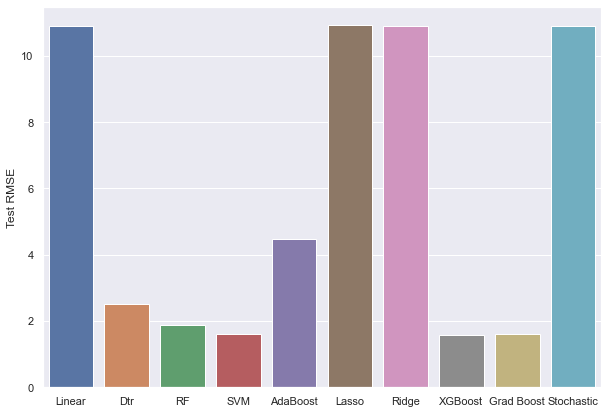

In [493]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('Test RMSE')
plt.show()

<b>Correlation of the models

In [495]:
predictions = {'Linear': lin_yhat_test, 'DTr': dtree_yhat_test, 'RF': rf_yhat_test,
               'SVM': svr_yhat_test, 'Adabost': adb_yhat_test, 'Lasso': lasso_yhat_test, 'Ridge': ridge_yhat_test,
               'XGBoost': xgb_yhat_test, 'GradBoost': gbr_yhat_test, 'Stochastic Grad': sgd_yhat_test}
df_predictions = pd.DataFrame(data=predictions) 
df_predictions.corr()

,Linear,DTr,RF,SVM,Adabost,Lasso,Ridge,XGBoost,GradBoost,Stochastic Grad
Linear,1.000000,0.873294,0.876170,0.874644,0.866569,0.997192,1.000000,0.873703,0.875213,0.999911
DTr,0.873294,1.000000,0.996013,0.992114,0.982811,0.871383,0.873292,0.994224,0.996810,0.873222
RF,0.876170,0.996013,1.000000,0.995471,0.988056,0.874247,0.876166,0.997646,0.998733,0.876067
SVM,0.874644,0.992114,0.995471,1.000000,0.979932,0.870426,0.874637,0.996717,0.996306,0.874409
Adabost,0.866569,0.982811,0.988056,0.979932,1.000000,0.867572,0.866573,0.984737,0.985963,0.866848
Lasso,0.997192,0.871383,0.874247,0.870426,0.867572,1.000000,0.997197,0.870690,0.872257,0.997253
Ridge,1.000000,0.873292,0.876166,0.874637,0.866573,0.997197,1.000000,0.873696,0.875207,0.999914
XGBoost,0.873703,0.994224,0.997646,0.996717,0.984737,0.870690,0.873696,1.000000,0.998405,0.873479
GradBoost,0.875213,0.996810,0.998733,0.996306,0.985963,0.872257,0.875207,0.998405,1.000000,0.875031
Stochastic Grad,0.999911,0.873222,0.876067,0.874409,0.866848,0.997253,0.999914,0.873479,0.875031,1.000000


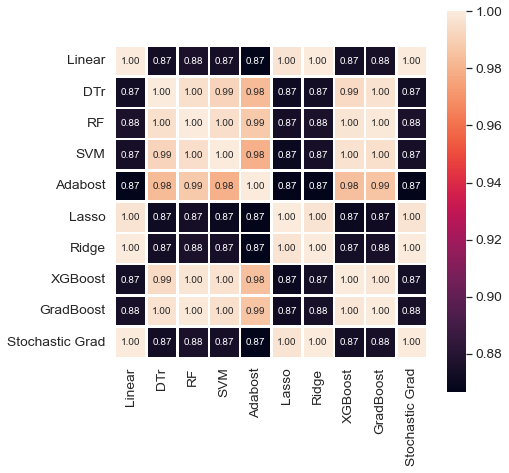

In [496]:
plt.figure(figsize=(7, 7))
sns.set(font_scale=1.25)
sns.heatmap(df_predictions.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_predictions.columns , xticklabels=df_predictions.columns
            )
plt.show()

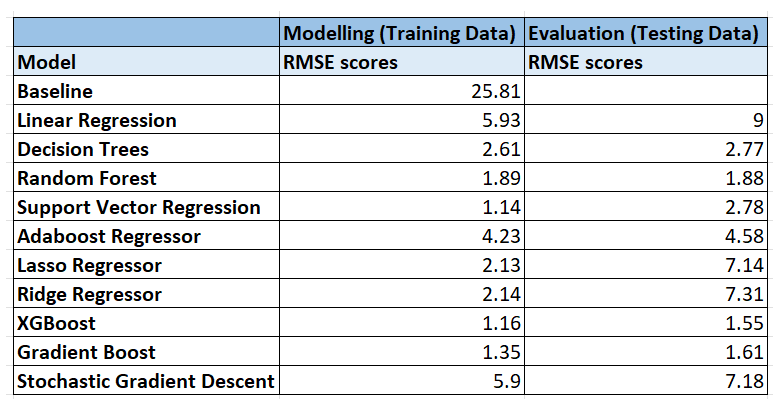


At the onset of evaluation, it is seen that XGBoost has better RMSE scores followed by Gradient Boost Regressor and Random Forest
<br>
<br>

Looking at feature importance for random forest and decision tree models, <b>LFE</b> is the <b>most important predictor<b> followed by the year,ASMR,median income,specific age ranges,number of jobs in the region, smoking habits and death.

In [497]:
#Feature Importance
#We will check the feature importance of the 3 best performing models 

xgb_feature_imp = best_xgb.feature_importances_ 

gbr_feature_imp = best_gbr.feature_importances_ 

rf_feature_imp = best_rforest.feature_importances_



In [498]:
print("Feature importance for XG Boost Regressor")
xgb_imp_df =pd.DataFrame(xgb_feature_imp,Xtrain.columns)
xgb_imp_df.rename(columns={0:'Feature importance'},inplace=True)
xgb_imp_df.sort_values('Feature importance',ascending = False)

Feature importance for XG Boost Regressor


,Feature importance
Year_2021,0.676791
LFE,0.286317
ASMR,0.017654
Household_Deprived_1_more_dimension,0.012246
Median_Income,0.004948
Fertility_Rate,0.002044


In [499]:
print("Feature importance for Gradient Boost Regressor")
gbr_imp_df =pd.DataFrame(gbr_feature_imp,Xtrain.columns)
gbr_imp_df.rename(columns={0:'Feature importance'},inplace=True)
gbr_imp_df.sort_values('Feature importance',ascending = False)

Feature importance for Gradient Boost Regressor


,Feature importance
LFE,0.941600
Year_2021,0.034384
ASMR,0.008186
Household_Deprived_1_more_dimension,0.006283
Median_Income,0.005684
Fertility_Rate,0.003863


In [500]:
print("Feature importance for Random Forest")
rf_imp_df =pd.DataFrame(rf_feature_imp,Xtrain.columns)
rf_imp_df.rename(columns={0:'Feature importance'},inplace=True)
rf_imp_df.sort_values('Feature importance',ascending = False)

Feature importance for Random Forest


,Feature importance
LFE,0.945159
Year_2021,0.025059
ASMR,0.010978
Household_Deprived_1_more_dimension,0.007319
Median_Income,0.007104
Fertility_Rate,0.004381


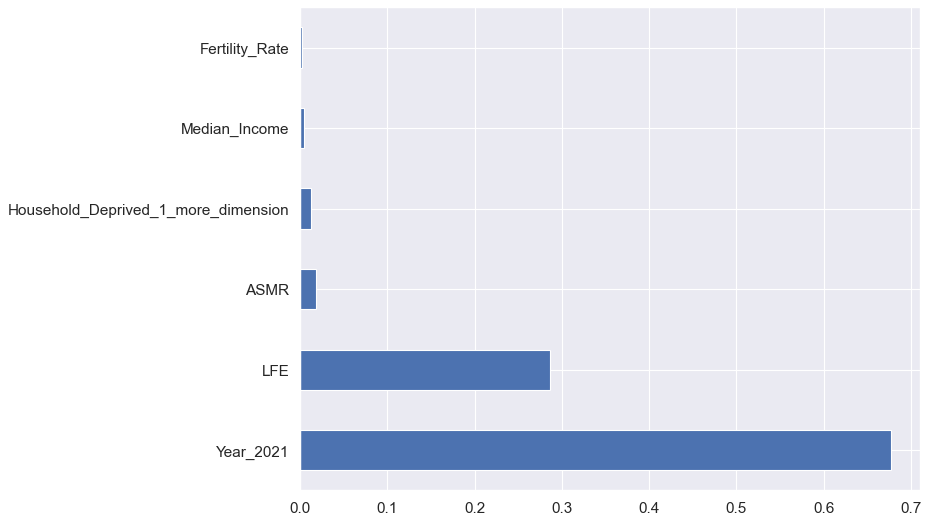

In [501]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(xgb_feature_imp, index= Xtrain.columns)

feat_importances.nlargest(7).plot(kind='barh')

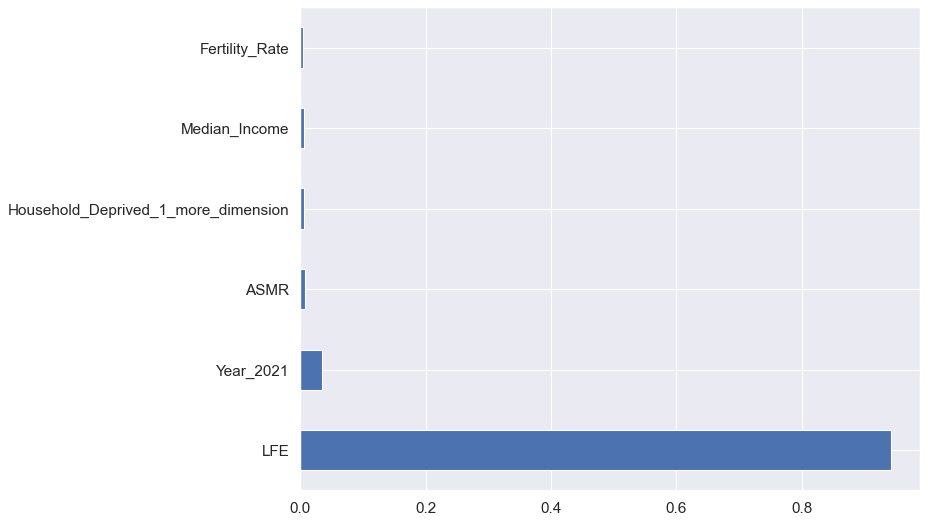

In [502]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(gbr_feature_imp, index= Xtrain.columns)

feat_importances.nlargest(7).plot(kind='barh')

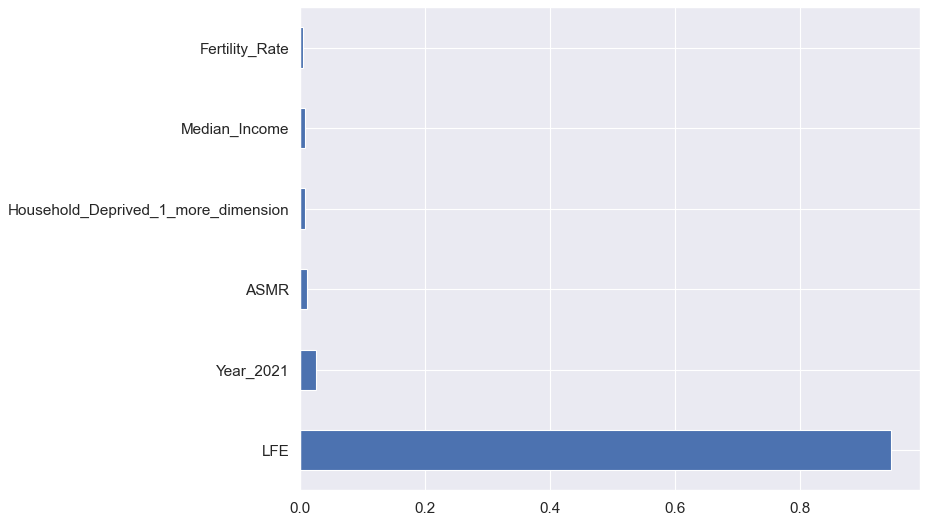

In [503]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf_feature_imp, index= Xtrain.columns)

feat_importances.nlargest(20).plot(kind='barh')


